In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import hvplot.pandas
import numpy as np
import requests
import time
import requests 
import json

from config import geoapify_key

%matplotlib inline 

In [2]:
# Unauthenticated client only works with public data sets. Note 'None'
# in place of application token, and no username or password:
url = "https://data.lacity.org/resource/2nrs-mtv8.json?"
limit = "&$limit=1000000"
token = "$$app_token=2chCzz50gH6DpOapebwdtsXcQ"
# params = {"token": "$$app_token=2chCzz50gH6DpOapebwdtsXcQ",
#           "limit": "&$limit=10000"
# }
response = requests.get(url,limit).json()

In [3]:
len(response)

925720

In [4]:
response

[{'dr_no': '190326475',
  'date_rptd': '2020-03-01T00:00:00.000',
  'date_occ': '2020-03-01T00:00:00.000',
  'time_occ': '2130',
  'area': '07',
  'area_name': 'Wilshire',
  'rpt_dist_no': '0784',
  'part_1_2': '1',
  'crm_cd': '510',
  'crm_cd_desc': 'VEHICLE - STOLEN',
  'vict_age': '0',
  'vict_sex': 'M',
  'vict_descent': 'O',
  'premis_cd': '101',
  'premis_desc': 'STREET',
  'status': 'AA',
  'status_desc': 'Adult Arrest',
  'crm_cd_1': '510',
  'crm_cd_2': '998',
  'location': '1900 S  LONGWOOD                     AV',
  'lat': '34.0375',
  'lon': '-118.3506'},
 {'dr_no': '200106753',
  'date_rptd': '2020-02-09T00:00:00.000',
  'date_occ': '2020-02-08T00:00:00.000',
  'time_occ': '1800',
  'area': '01',
  'area_name': 'Central',
  'rpt_dist_no': '0182',
  'part_1_2': '1',
  'crm_cd': '330',
  'crm_cd_desc': 'BURGLARY FROM VEHICLE',
  'mocodes': '1822 1402 0344',
  'vict_age': '47',
  'vict_sex': 'M',
  'vict_descent': 'O',
  'premis_cd': '128',
  'premis_desc': 'BUS STOP/LAYOVER

In [5]:
response_df = pd.DataFrame(response)

In [6]:
response_df.head()

,dr_no,date_rptd,date_occ,time_occ,area,area_name,rpt_dist_no,part_1_2,crm_cd,crm_cd_desc,...,crm_cd_2,location,lat,lon,mocodes,weapon_used_cd,weapon_desc,cross_street,crm_cd_3,crm_cd_4
0,190326475,2020-03-01T00:00:00.000,2020-03-01T00:00:00.000,2130,07,Wilshire,0784,1,510,VEHICLE - STOLEN,...,998,1900 S LONGWOOD AV,34.0375,-118.3506,NaN,NaN,NaN,NaN,NaN,NaN
1,200106753,2020-02-09T00:00:00.000,2020-02-08T00:00:00.000,1800,01,Central,0182,1,330,BURGLARY FROM VEHICLE,...,998,1000 S FLOWER ST,34.0444,-118.2628,1822 1402 0344,NaN,NaN,NaN,NaN,NaN
2,200320258,2020-11-11T00:00:00.000,2020-11-04T00:00:00.000,1700,03,Southwest,0356,1,480,BIKE - STOLEN,...,NaN,1400 W 37TH ST,34.021,-118.3002,0344 1251,NaN,NaN,NaN,NaN,NaN
3,200907217,2023-05-10T00:00:00.000,2020-03-10T00:00:00.000,2037,09,Van Nuys,0964,1,343,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),...,NaN,14000 RIVERSIDE DR,34.1576,-118.4387,0325 1501,NaN,NaN,NaN,NaN,NaN
4,220614831,2022-08-18T00:00:00.000,2020-08-17T00:00:00.000,1200,06,Hollywood,0666,2,354,THEFT OF IDENTITY,...,NaN,1900 TRANSIENT,34.0944,-118.3277,1822 1501 0930 2004,NaN,NaN,NaN,NaN,NaN


In [7]:
response_df["dr_no"].count()

925720

In [8]:
headers = ['date_occ','area_name','crm_cd', 'crm_cd_2', 'crm_cd_3', 'crm_cd_4', 'vict_age', 'vict_sex','vict_descent', 'premis_desc', 'lat','lon','weapons_used_cd']
data_clean = response_df.reindex(columns=headers)
data_clean['date_occ'] = pd.to_datetime(data_clean['date_occ'])
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 925720 entries, 0 to 925719
Data columns (total 13 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   date_occ         925720 non-null  datetime64[ns]
 1   area_name        925720 non-null  object        
 2   crm_cd           925720 non-null  object        
 3   crm_cd_2         67237 non-null   object        
 4   crm_cd_3         2260 non-null    object        
 5   crm_cd_4         64 non-null      object        
 6   vict_age         925720 non-null  object        
 7   vict_sex         802562 non-null  object        
 8   vict_descent     802552 non-null  object        
 9   premis_desc      925161 non-null  object        
 10  lat              925720 non-null  object        
 11  lon              925720 non-null  object        
 12  weapons_used_cd  0 non-null       float64       
dtypes: datetime64[ns](1), float64(1), object(11)
memory usage: 91.8+ MB


In [9]:
data_clean["lon"]=data_clean["lon"].astype(float)
data_clean["lat"]=data_clean["lat"].astype(float)

nona = data_clean.loc[data_clean["lat"] != 0]
nonaboth = nona.loc[nona["lon"] != 0]
nonatotal = nonaboth.loc[nonaboth["area_name"] != 0]

nonatotal["crm_cd"] = nonatotal["crm_cd"].astype(float)
nonatotal["crm_cd_2"] = nonatotal["crm_cd_2"].astype(float)
nonatotal["crm_cd_3"] = nonatotal["crm_cd_3"].astype(float)
nonatotal["crm_cd_4"] = nonatotal["crm_cd_4"].astype(float)
nonatotal["vict_age"] = nonatotal["vict_age"].astype(float)

clean = nonatotal.dropna(subset=["date_occ", "area_name", "lat", "lon"])
clean.head()
#nonatotal["premis_desc"].unique()

,date_occ,area_name,crm_cd,crm_cd_2,crm_cd_3,crm_cd_4,vict_age,vict_sex,vict_descent,premis_desc,lat,lon,weapons_used_cd
0,2020-03-01,Wilshire,510.0,998.0,NaN,NaN,0.0,M,O,STREET,34.0375,-118.3506,NaN
1,2020-02-08,Central,330.0,998.0,NaN,NaN,47.0,M,O,BUS STOP/LAYOVER (ALSO QUERY 124),34.0444,-118.2628,NaN
2,2020-11-04,Southwest,480.0,NaN,NaN,NaN,19.0,X,X,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",34.0210,-118.3002,NaN
3,2020-03-10,Van Nuys,343.0,NaN,NaN,NaN,19.0,M,O,CLOTHING STORE,34.1576,-118.4387,NaN
4,2020-08-17,Hollywood,354.0,NaN,NaN,NaN,28.0,M,H,SIDEWALK,34.0944,-118.3277,NaN


In [10]:
clean_2021 = clean.loc[(clean["date_occ"] >= "2020-03-01") & (clean["date_occ"] < "2021-03-01")]
clean_2122 = clean.loc[(clean["date_occ"] >= "2021-03-01") & (clean["date_occ"] < "2022-03-01")]
clean_2223 = clean.loc[(clean["date_occ"] >= "2022-03-01") & (clean["date_occ"] < "2023-03-01")]
clean_2324 = clean.loc[(clean["date_occ"] >= "2023-03-01") & (clean["date_occ"] < "2024-03-01")]


In [11]:
clean_2021["Year"] = "Q1"
clean_2122["Year"] = "Q2"
clean_2223["Year"] = "Q3"
clean_2324["Year"] = "Q4"

clean_2324.count()

C:\Users\yumai\AppData\Local\Temp\ipykernel_31264\3728411588.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_2021["Year"] = "Q1"
C:\Users\yumai\AppData\Local\Temp\ipykernel_31264\3728411588.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_2122["Year"] = "Q2"
C:\Users\yumai\AppData\Local\Temp\ipykernel_31264\3728411588.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in

date_occ           228420
area_name          228420
crm_cd             228420
crm_cd_2            15378
crm_cd_3              510
crm_cd_4               11
vict_age           228420
vict_sex           196482
vict_descent       196478
premis_desc        228222
lat                228420
lon                228420
weapons_used_cd         0
Year               228420
dtype: int64

In [12]:
clean_2021.reset_index(drop=True)
clean_2122.reset_index(drop=True)
clean_2223.reset_index(drop=True)
clean_2324.reset_index(drop=True)

#combodata = pd.concat([clean_2021, clean_2122, clean_2223, clean_2324], ignore_index=False, axis=1)
#comboall = combodata.iloc[:, [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 52, 53, 54, 55]]
#comboall

clean_2122.head()

,date_occ,area_name,crm_cd,crm_cd_2,crm_cd_3,crm_cd_4,vict_age,vict_sex,vict_descent,premis_desc,lat,lon,weapons_used_cd,Year
123084,2021-07-06,Topanga,510.0,NaN,NaN,NaN,0.0,NaN,NaN,STREET,34.1753,-118.6057,NaN,Q2
125408,2021-11-08,Van Nuys,510.0,NaN,NaN,NaN,0.0,NaN,NaN,STREET,34.1867,-118.4487,NaN,Q2
125491,2021-05-14,Newton,510.0,NaN,NaN,NaN,0.0,NaN,NaN,STREET,34.0220,-118.2528,NaN,Q2
126984,2021-10-30,Northeast,510.0,NaN,NaN,NaN,0.0,NaN,NaN,STREET,34.0864,-118.2190,NaN,Q2
127259,2021-06-14,Central,510.0,NaN,NaN,NaN,0.0,NaN,NaN,STREET,34.0481,-118.2472,NaN,Q2


In [13]:
combodata = pd.concat([clean_2021, clean_2122, clean_2223, clean_2324], ignore_index=False, axis=0)
#comboall = combodata.iloc[:, [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 52, 53, 54, 55]]
combodata.head()


,date_occ,area_name,crm_cd,crm_cd_2,crm_cd_3,crm_cd_4,vict_age,vict_sex,vict_descent,premis_desc,lat,lon,weapons_used_cd,Year
0,2020-03-01,Wilshire,510.0,998.0,NaN,NaN,0.0,M,O,STREET,34.0375,-118.3506,NaN,Q1
2,2020-11-04,Southwest,480.0,NaN,NaN,NaN,19.0,X,X,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",34.0210,-118.3002,NaN,Q1
3,2020-03-10,Van Nuys,343.0,NaN,NaN,NaN,19.0,M,O,CLOTHING STORE,34.1576,-118.4387,NaN,Q1
4,2020-08-17,Hollywood,354.0,NaN,NaN,NaN,28.0,M,H,SIDEWALK,34.0944,-118.3277,NaN,Q1
5,2020-12-01,Southeast,354.0,NaN,NaN,NaN,41.0,M,H,SINGLE FAMILY DWELLING,33.9467,-118.2463,NaN,Q1


In [14]:
mapclean = combodata.groupby(["area_name", "Year"])[["lat", "lon"]].mean().reset_index()
mapclean

,area_name,Year,lat,lon
0,77th Street,Q1,33.977766,-118.296927
1,77th Street,Q2,33.977564,-118.297434
2,77th Street,Q3,33.977793,-118.297236
3,77th Street,Q4,33.977619,-118.297572
4,Central,Q1,34.047398,-118.250188
...,...,...,...,...
79,West Valley,Q4,34.186532,-118.520045
80,Wilshire,Q1,34.061586,-118.352348
81,Wilshire,Q2,34.061794,-118.352728
82,Wilshire,Q3,34.061656,-118.351494


In [15]:
YearArCount = combodata.groupby(["area_name","Year"])["area_name"].count().reset_index(name="Total Numbers")
YearArCount

,area_name,Year,Total Numbers
0,77th Street,Q1,12969
1,77th Street,Q2,12968
2,77th Street,Q3,14750
3,77th Street,Q4,13614
4,Central,Q1,10978
...,...,...,...
79,West Valley,Q4,9768
80,Wilshire,Q1,9158
81,Wilshire,Q2,9826
82,Wilshire,Q3,11369


In [16]:
YearArCount.reset_index(drop=True, inplace=True)
mapclean.reset_index(drop=True, inplace=True)
mapcleaned = pd.concat([YearArCount, mapclean], ignore_index=False, axis=1)
mapdata = mapcleaned.iloc[:, [0, 1, 2, 5, 6]]
mapdata

,area_name,Year,Total Numbers,lat,lon
0,77th Street,Q1,12969,33.977766,-118.296927
1,77th Street,Q2,12968,33.977564,-118.297434
2,77th Street,Q3,14750,33.977793,-118.297236
3,77th Street,Q4,13614,33.977619,-118.297572
4,Central,Q1,10978,34.047398,-118.250188
...,...,...,...,...,...
79,West Valley,Q4,9768,34.186532,-118.520045
80,Wilshire,Q1,9158,34.061586,-118.352348
81,Wilshire,Q2,9826,34.061794,-118.352728
82,Wilshire,Q3,11369,34.061656,-118.351494


In [17]:
mapplot= mapdata.hvplot.points(
    "lon",
    "lat",
    geo = True,
    tiles = "OSM",
    frame_width = 700,
    frame_height = 500,
    scale = 0.1, 
    size = "Total Numbers",
    color = "Year",
    alpha = 0.3,
    dynspread = 2.0,
)
mapplot

c:\Users\yumai\anaconda3\envs\Class2024\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated and will be removed in a future release
  "class": algorithms.Blowfish,


:Overlay
   .WMTS.I   :WMTS   [Longitude,Latitude]
   .Points.I :Points   [lon,lat]   (Year,Total Numbers)

In [18]:
combodata.head()

,date_occ,area_name,crm_cd,crm_cd_2,crm_cd_3,crm_cd_4,vict_age,vict_sex,vict_descent,premis_desc,lat,lon,weapons_used_cd,Year
0,2020-03-01,Wilshire,510.0,998.0,NaN,NaN,0.0,M,O,STREET,34.0375,-118.3506,NaN,Q1
2,2020-11-04,Southwest,480.0,NaN,NaN,NaN,19.0,X,X,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",34.0210,-118.3002,NaN,Q1
3,2020-03-10,Van Nuys,343.0,NaN,NaN,NaN,19.0,M,O,CLOTHING STORE,34.1576,-118.4387,NaN,Q1
4,2020-08-17,Hollywood,354.0,NaN,NaN,NaN,28.0,M,H,SIDEWALK,34.0944,-118.3277,NaN,Q1
5,2020-12-01,Southeast,354.0,NaN,NaN,NaN,41.0,M,H,SINGLE FAMILY DWELLING,33.9467,-118.2463,NaN,Q1


In [19]:
combo2122 = combodata.groupby(["area_name", "Year"])["area_name"].count().reset_index(name="Total Counts")
combo2122

,area_name,Year,Total Counts
0,77th Street,Q1,12969
1,77th Street,Q2,12968
2,77th Street,Q3,14750
3,77th Street,Q4,13614
4,Central,Q1,10978
...,...,...,...
79,West Valley,Q4,9768
80,Wilshire,Q1,9158
81,Wilshire,Q2,9826
82,Wilshire,Q3,11369


In [20]:
cleaned2122 = clean_2021.groupby(["area_name"])["area_name"].count()
cleaned2223 = clean_2122.groupby(["area_name"])["area_name"].count()
cleaned2223 = clean_2223.groupby(["area_name"])["area_name"].count()
cleaned2324 = clean_2324.groupby(["area_name"])["area_name"].count()



In [21]:
cleaned2021 = clean_2021.loc[(clean_2021["area_name"] == "77th Street")]

mar20 = cleaned2021.loc[(cleaned2021["date_occ"] >= "2020-03-01") & (cleaned2021["date_occ"] < "2020-04-01")]
mar20["Month"] = "March"
apr20 = cleaned2021.loc[(cleaned2021["date_occ"] >= "2020-04-01") & (cleaned2021["date_occ"] < "2020-05-01")]
apr20["Month"] = "April"
may20 = cleaned2021.loc[(cleaned2021["date_occ"] >= "2020-05-01") & (cleaned2021["date_occ"] < "2020-06-01")]
may20["Month"] = "May"
jun20 = cleaned2021.loc[(cleaned2021["date_occ"] >= "2020-06-01") & (cleaned2021["date_occ"] < "2020-07-01")]
jun20["Month"] = "June"
jul20 = cleaned2021.loc[(cleaned2021["date_occ"] >= "2020-07-01") & (cleaned2021["date_occ"] < "2020-08-01")]
jul20["Month"] = "July"
aug20 = cleaned2021.loc[(cleaned2021["date_occ"] >= "2020-08-01") & (cleaned2021["date_occ"] < "2020-09-01")]
aug20["Month"] = "August"
sep20 = cleaned2021.loc[(cleaned2021["date_occ"] >= "2020-09-01") & (cleaned2021["date_occ"] < "2020-10-01")]
sep20["Month"] = "September"
oct20 = cleaned2021.loc[(cleaned2021["date_occ"] >= "2020-10-01") & (cleaned2021["date_occ"] < "2020-11-01")]
oct20["Month"] = "October"
nov20 = cleaned2021.loc[(cleaned2021["date_occ"] >= "2020-11-01") & (cleaned2021["date_occ"] < "2020-12-01")]
nov20["Month"] = "November"
dec20 = cleaned2021.loc[(cleaned2021["date_occ"] >= "2020-12-01") & (cleaned2021["date_occ"] < "2021-01-01")]
dec20["Month"] = "December"
jan21 = cleaned2021.loc[(cleaned2021["date_occ"] >= "2021-01-01") & (cleaned2021["date_occ"] < "2021-02-01")]
jan21["Month"] = "January"
feb21 = cleaned2021.loc[(cleaned2021["date_occ"] >= "2021-02-01") & (cleaned2021["date_occ"] < "2021-03-01")]
feb21["Month"] = "February"

mar20.reset_index(drop=True, inplace=True)
apr20.reset_index(drop=True, inplace=True)
may20.reset_index(drop=True, inplace=True)
jun20.reset_index(drop=True, inplace=True)
jul20.reset_index(drop=True, inplace=True)
aug20.reset_index(drop=True, inplace=True)
sep20.reset_index(drop=True, inplace=True)
oct20.reset_index(drop=True, inplace=True)
nov20.reset_index(drop=True, inplace=True)
dec20.reset_index(drop=True, inplace=True)
jan21.reset_index(drop=True, inplace=True)
feb21.reset_index(drop=True, inplace=True)



annual2021df = pd.concat([mar20, apr20, may20, jun20, jul20, aug20, sep20, oct20, nov20, dec20, jan21, feb21], ignore_index=False, axis=0)

annual2021df.head()

C:\Users\yumai\AppData\Local\Temp\ipykernel_31264\187903095.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mar20["Month"] = "March"
C:\Users\yumai\AppData\Local\Temp\ipykernel_31264\187903095.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  apr20["Month"] = "April"
C:\Users\yumai\AppData\Local\Temp\ipykernel_31264\187903095.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the 

,date_occ,area_name,crm_cd,crm_cd_2,crm_cd_3,crm_cd_4,vict_age,vict_sex,vict_descent,premis_desc,lat,lon,weapons_used_cd,Year,Month
0,2020-03-20,77th Street,354.0,NaN,NaN,NaN,37.0,F,B,SINGLE FAMILY DWELLING,33.9722,-118.2696,NaN,Q1,March
1,2020-03-05,77th Street,354.0,NaN,NaN,NaN,47.0,M,B,SINGLE FAMILY DWELLING,33.9519,-118.3025,NaN,Q1,March
2,2020-03-19,77th Street,354.0,NaN,NaN,NaN,61.0,F,H,SINGLE FAMILY DWELLING,33.9863,-118.3264,NaN,Q1,March
3,2020-03-03,77th Street,354.0,NaN,NaN,NaN,50.0,M,B,SINGLE FAMILY DWELLING,33.9563,-118.3069,NaN,Q1,March
4,2020-03-11,77th Street,420.0,NaN,NaN,NaN,34.0,M,B,STREET,33.9806,-118.2827,NaN,Q1,March


In [22]:
cleaned2122 = clean_2122.loc[(clean_2122["area_name"] == "77th Street")]

mar21 = cleaned2122.loc[(cleaned2122["date_occ"] >= "2021-03-01") & (cleaned2122["date_occ"] < "2021-04-01")]
mar21["Month"] = "March"
apr21 = cleaned2122.loc[(cleaned2122["date_occ"] >= "2021-04-01") & (cleaned2122["date_occ"] < "2021-05-01")]
apr21["Month"] = "April"
may21 = cleaned2122.loc[(cleaned2122["date_occ"] >= "2021-05-01") & (cleaned2122["date_occ"] < "2021-06-01")]
may21["Month"] = "May"
jun21 = cleaned2122.loc[(cleaned2122["date_occ"] >= "2021-06-01") & (cleaned2122["date_occ"] < "2021-07-01")]
jun21["Month"] = "June"
jul21 = cleaned2122.loc[(cleaned2122["date_occ"] >= "2021-07-01") & (cleaned2122["date_occ"] < "2021-08-01")]
jul21["Month"] = "July"
aug21 = cleaned2122.loc[(cleaned2122["date_occ"] >= "2021-08-01") & (cleaned2122["date_occ"] < "2021-09-01")]
aug21["Month"] = "August"
sep21 = cleaned2122.loc[(cleaned2122["date_occ"] >= "2021-09-01") & (cleaned2122["date_occ"] < "2021-10-01")]
sep21["Month"] = "September"
oct21 = cleaned2122.loc[(cleaned2122["date_occ"] >= "2021-10-01") & (cleaned2122["date_occ"] < "2021-11-01")]
oct21["Month"] = "October"
nov21 = cleaned2122.loc[(cleaned2122["date_occ"] >= "2021-11-01") & (cleaned2122["date_occ"] < "2021-12-01")]
nov21["Month"] = "November"
dec21 = cleaned2122.loc[(cleaned2122["date_occ"] >= "2021-12-01") & (cleaned2122["date_occ"] < "2022-01-01")]
dec21["Month"] = "December"
jan22 = cleaned2122.loc[(cleaned2122["date_occ"] >= "2022-01-01") & (cleaned2122["date_occ"] < "2022-02-01")]
jan22["Month"] = "January"
feb22 = cleaned2122.loc[(cleaned2122["date_occ"] >= "2022-02-01") & (cleaned2122["date_occ"] < "2022-03-01")]
feb22["Month"] = "February"

mar21.reset_index(drop=True, inplace=True)
apr21.reset_index(drop=True, inplace=True)
may21.reset_index(drop=True, inplace=True)
jun21.reset_index(drop=True, inplace=True)
jul21.reset_index(drop=True, inplace=True)
aug21.reset_index(drop=True, inplace=True)
sep21.reset_index(drop=True, inplace=True)
oct21.reset_index(drop=True, inplace=True)
nov21.reset_index(drop=True, inplace=True)
dec21.reset_index(drop=True, inplace=True)
jan22.reset_index(drop=True, inplace=True)
feb22.reset_index(drop=True, inplace=True)



annual2022df = pd.concat([mar21, apr21, may21, jun21, jul21, aug21, sep21, oct21, nov21, dec21, jan22, feb22], ignore_index=False, axis=0)

annual2022df.head()

C:\Users\yumai\AppData\Local\Temp\ipykernel_31264\384944369.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mar21["Month"] = "March"
C:\Users\yumai\AppData\Local\Temp\ipykernel_31264\384944369.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  apr21["Month"] = "April"
C:\Users\yumai\AppData\Local\Temp\ipykernel_31264\384944369.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the 

,date_occ,area_name,crm_cd,crm_cd_2,crm_cd_3,crm_cd_4,vict_age,vict_sex,vict_descent,premis_desc,lat,lon,weapons_used_cd,Year,Month
0,2021-03-05,77th Street,946.0,NaN,NaN,NaN,45.0,F,H,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",33.9667,-118.2889,NaN,Q2,March
1,2021-03-17,77th Street,510.0,NaN,NaN,NaN,0.0,NaN,NaN,STREET,33.9923,-118.3002,NaN,Q2,March
2,2021-03-31,77th Street,230.0,NaN,NaN,NaN,0.0,X,X,STREET,33.9747,-118.2816,NaN,Q2,March
3,2021-03-04,77th Street,420.0,NaN,NaN,NaN,0.0,NaN,NaN,PARKING LOT,33.9622,-118.2827,NaN,Q2,March
4,2021-03-13,77th Street,236.0,NaN,NaN,NaN,47.0,M,B,SINGLE FAMILY DWELLING,33.9709,-118.3112,NaN,Q2,March


In [23]:
cleaned2223 = clean_2223.loc[(clean_2223["area_name"] == "77th Street")]

mar22 = cleaned2223.loc[(cleaned2223["date_occ"] >= "2022-03-01") & (cleaned2223["date_occ"] < "2022-04-01")]
mar22["Month"] = "March"
apr22 = cleaned2223.loc[(cleaned2223["date_occ"] >= "2022-04-01") & (cleaned2223["date_occ"] < "2022-05-01")]
apr22["Month"] = "April"
may22 = cleaned2223.loc[(cleaned2223["date_occ"] >= "2022-05-01") & (cleaned2223["date_occ"] < "2022-06-01")]
may22["Month"] = "May"
jun22 = cleaned2223.loc[(cleaned2223["date_occ"] >= "2022-06-01") & (cleaned2223["date_occ"] < "2022-07-01")]
jun22["Month"] = "June"
jul22 = cleaned2223.loc[(cleaned2223["date_occ"] >= "2022-07-01") & (cleaned2223["date_occ"] < "2022-08-01")]
jul22["Month"] = "July"
aug22 = cleaned2223.loc[(cleaned2223["date_occ"] >= "2022-08-01") & (cleaned2223["date_occ"] < "2022-09-01")]
aug22["Month"] = "August"
sep22 = cleaned2223.loc[(cleaned2223["date_occ"] >= "2022-09-01") & (cleaned2223["date_occ"] < "2022-10-01")]
sep22["Month"] = "September"
oct22 = cleaned2223.loc[(cleaned2223["date_occ"] >= "2022-10-01") & (cleaned2223["date_occ"] < "2022-11-01")]
oct22["Month"] = "October"
nov22 = cleaned2223.loc[(cleaned2223["date_occ"] >= "2022-11-01") & (cleaned2223["date_occ"] < "2022-12-01")]
nov22["Month"] = "November"
dec22 = cleaned2223.loc[(cleaned2223["date_occ"] >= "2022-12-01") & (cleaned2223["date_occ"] < "2023-01-01")]
dec22["Month"] = "December"
jan23 = cleaned2223.loc[(cleaned2223["date_occ"] >= "2023-01-01") & (cleaned2223["date_occ"] < "2023-02-01")]
jan23["Month"] = "January"
feb23 = cleaned2223.loc[(cleaned2223["date_occ"] >= "2023-02-01") & (cleaned2223["date_occ"] < "2023-03-01")]
feb23["Month"] = "February"

mar22.reset_index(drop=True, inplace=True)
apr22.reset_index(drop=True, inplace=True)
may22.reset_index(drop=True, inplace=True)
jun22.reset_index(drop=True, inplace=True)
jul22.reset_index(drop=True, inplace=True)
aug22.reset_index(drop=True, inplace=True)
sep22.reset_index(drop=True, inplace=True)
oct22.reset_index(drop=True, inplace=True)
nov22.reset_index(drop=True, inplace=True)
dec22.reset_index(drop=True, inplace=True)
jan23.reset_index(drop=True, inplace=True)
feb23.reset_index(drop=True, inplace=True)



annual2023df = pd.concat([mar22, apr22, may22, jun22, jul22, aug22, sep22, oct22, nov22, dec22, jan23, feb23], ignore_index=False, axis=0)

annual2023df.head()

C:\Users\yumai\AppData\Local\Temp\ipykernel_31264\1022372872.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mar22["Month"] = "March"
C:\Users\yumai\AppData\Local\Temp\ipykernel_31264\1022372872.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  apr22["Month"] = "April"
C:\Users\yumai\AppData\Local\Temp\ipykernel_31264\1022372872.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in t

,date_occ,area_name,crm_cd,crm_cd_2,crm_cd_3,crm_cd_4,vict_age,vict_sex,vict_descent,premis_desc,lat,lon,weapons_used_cd,Year,Month
0,2022-03-18,77th Street,624.0,NaN,NaN,NaN,28.0,F,W,OTHER BUSINESS,33.9856,-118.2915,NaN,Q3,March
1,2022-03-16,77th Street,520.0,NaN,NaN,NaN,59.0,M,B,STREET,33.9625,-118.3003,NaN,Q3,March
2,2022-03-07,77th Street,626.0,NaN,NaN,NaN,19.0,F,B,SINGLE FAMILY DWELLING,33.9818,-118.2811,NaN,Q3,March
3,2022-03-10,77th Street,956.0,NaN,NaN,NaN,22.0,F,H,SINGLE FAMILY DWELLING,33.9721,-118.2739,NaN,Q3,March
4,2022-03-30,77th Street,745.0,NaN,NaN,NaN,45.0,F,B,PARKING LOT,33.9713,-118.2739,NaN,Q3,March


In [25]:
cleaned2324 = clean_2324.loc[(clean_2324["area_name"] == "77th Street")]

mar23 = cleaned2324.loc[(cleaned2324["date_occ"] >= "2023-03-01") & (cleaned2324["date_occ"] < "2023-04-01")]
mar23["Month"] = "March"
apr23 = cleaned2324.loc[(cleaned2324["date_occ"] >= "2023-04-01") & (cleaned2324["date_occ"] < "2023-05-01")]
apr23["Month"] = "April"
may23 = cleaned2324.loc[(cleaned2324["date_occ"] >= "2023-05-01") & (cleaned2324["date_occ"] < "2023-06-01")]
may23["Month"] = "May"
jun23 = cleaned2324.loc[(cleaned2324["date_occ"] >= "2023-06-01") & (cleaned2324["date_occ"] < "2023-07-01")]
jun23["Month"] = "June"
jul23 = cleaned2324.loc[(cleaned2324["date_occ"] >= "2023-07-01") & (cleaned2324["date_occ"] < "2023-08-01")]
jul23["Month"] = "July"
aug23 = cleaned2324.loc[(cleaned2324["date_occ"] >= "2023-08-01") & (cleaned2324["date_occ"] < "2023-09-01")]
aug23["Month"] = "August"
sep23 = cleaned2324.loc[(cleaned2324["date_occ"] >= "2023-09-01") & (cleaned2324["date_occ"] < "2023-10-01")]
sep23["Month"] = "September"
oct23 = cleaned2324.loc[(cleaned2324["date_occ"] >= "2023-10-01") & (cleaned2324["date_occ"] < "2023-11-01")]
oct23["Month"] = "October"
nov23 = cleaned2324.loc[(cleaned2324["date_occ"] >= "2023-11-01") & (cleaned2324["date_occ"] < "2023-12-01")]
nov23["Month"] = "November"
dec23 = cleaned2324.loc[(cleaned2324["date_occ"] >= "2023-12-01") & (cleaned2324["date_occ"] < "2024-01-01")]
dec23["Month"] = "December"
jan24 = cleaned2324.loc[(cleaned2324["date_occ"] >= "2024-01-01") & (cleaned2324["date_occ"] < "2024-02-01")]
jan24["Month"] = "January"
feb24 = cleaned2324.loc[(cleaned2324["date_occ"] >= "2024-02-01") & (cleaned2324["date_occ"] < "2024-03-01")]
feb24["Month"] = "February"

mar23.reset_index(drop=True, inplace=True)
apr23.reset_index(drop=True, inplace=True)
may23.reset_index(drop=True, inplace=True)
jun23.reset_index(drop=True, inplace=True)
jul23.reset_index(drop=True, inplace=True)
aug23.reset_index(drop=True, inplace=True)
sep23.reset_index(drop=True, inplace=True)
oct23.reset_index(drop=True, inplace=True)
nov23.reset_index(drop=True, inplace=True)
dec23.reset_index(drop=True, inplace=True)
jan24.reset_index(drop=True, inplace=True)
feb24.reset_index(drop=True, inplace=True)



annual2024df = pd.concat([mar23, apr23, may23, jun23, jul23, aug23, sep23, oct23, nov23, dec23, jan24, feb24], ignore_index=False, axis=0)

annual2024df.head()

C:\Users\yumai\AppData\Local\Temp\ipykernel_31264\3010840462.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mar23["Month"] = "March"
C:\Users\yumai\AppData\Local\Temp\ipykernel_31264\3010840462.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  apr23["Month"] = "April"
C:\Users\yumai\AppData\Local\Temp\ipykernel_31264\3010840462.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in t

,date_occ,area_name,crm_cd,crm_cd_2,crm_cd_3,crm_cd_4,vict_age,vict_sex,vict_descent,premis_desc,lat,lon,weapons_used_cd,Year,Month
0,2023-03-03,77th Street,354.0,NaN,NaN,NaN,41.0,F,H,SINGLE FAMILY DWELLING,33.9708,-118.2763,NaN,Q4,March
1,2023-03-11,77th Street,626.0,NaN,NaN,NaN,27.0,M,H,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",33.9806,-118.3352,NaN,Q4,March
2,2023-03-02,77th Street,354.0,NaN,NaN,NaN,25.0,M,B,SINGLE FAMILY DWELLING,33.9674,-118.2652,NaN,Q4,March
3,2023-03-13,77th Street,230.0,NaN,NaN,NaN,10.0,M,B,SIDEWALK,33.9891,-118.2958,NaN,Q4,March
4,2023-03-22,77th Street,440.0,NaN,NaN,NaN,34.0,F,X,STREET,33.9768,-118.3177,NaN,Q4,March


In [96]:
annual2021 = annual2021df.groupby(["Month"])["date_occ"].count().reset_index(name="Total Counts")
annual2022 = annual2022df.groupby(["Month"])["date_occ"].count().reset_index(name="Total Counts")
annual2023 = annual2023df.groupby(["Month"])["date_occ"].count().reset_index(name="Total Counts")
annual2024 = annual2024df.groupby(["Month"])["date_occ"].count().reset_index(name="Total Counts")
annual2021

,Month,Total Counts
0,April,1057
1,August,1227
2,December,1053
3,February,1063
4,January,1029
5,July,1093
6,June,1094
7,March,1009
8,May,1068
9,November,1059


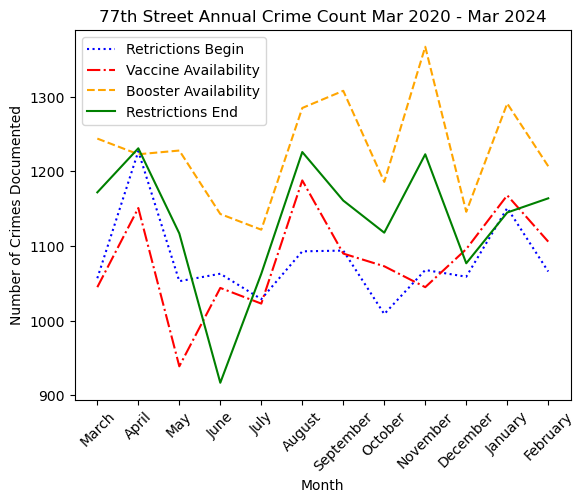

In [27]:
x1= ["March", "April", "May", "June", "July", "August", "September", "October", "November", "December", "January", "February",]
y1=annual2021["Total Counts"]
y2=annual2022["Total Counts"]
y3=annual2023["Total Counts"]
y4=annual2024["Total Counts"]

plt.plot(x1,y1, color='blue', linestyle='dotted', label="Retrictions Begin")
plt.plot(x1,y2, color='red', linestyle='dashdot', label="Vaccine Availability")
plt.plot(x1,y3, color='orange', linestyle='dashed', label="Booster Availability")
plt.plot(x1,y4, color='green', linestyle='solid', label="Restrictions End")
plt.xticks(rotation=45)
plt.xlabel("Month")
plt.ylabel("Number of Crimes Documented")

plt.legend(loc='best')
plt.tight_layout

plt.title("77th Street Annual Crime Count Mar 2020 - Mar 2024")
#plt.savefig("77th_Total_Vs_Year.jpg", bbox_inches="tight")
plt.show()

In [93]:
#DO NOT NEED    2020 - 2021 monthly counts
sum2021 = combodata.loc[(combodata["Year"] == "Q1")]

marsum20 = sum2021.loc[(sum2021["date_occ"] >= "2020-03-01") & (sum2021["date_occ"] < "2020-04-01")]
marsum20["Month"] = "March"
aprsum20 = sum2021[(sum2021["date_occ"] >= "2020-04-01") & (sum2021["date_occ"] < "2020-05-01")]
aprsum20["Month"] = "April"
maysum20 = sum2021.loc[(sum2021["date_occ"] >= "2020-05-01") & (sum2021["date_occ"] < "2020-06-01")]
maysum20["Month"] = "May"
junsum20 = sum2021.loc[(sum2021["date_occ"] >= "2020-06-01") & (sum2021["date_occ"] < "2020-07-01")]
junsum20["Month"] = "June"
julsum20 = sum2021.loc[(sum2021["date_occ"] >= "2020-07-01") & (sum2021["date_occ"] < "2020-08-01")]
julsum20["Month"] = "July"
augsum20 = sum2021.loc[(sum2021["date_occ"] >= "2020-08-01") & (sum2021["date_occ"] < "2020-09-01")]
augsum20["Month"] = "August"
sepsum20 = sum2021.loc[(sum2021["date_occ"] >= "2020-09-01") & (sum2021["date_occ"] < "2020-10-01")]
sepsum20["Month"] = "September"
octsum20 = sum2021.loc[(sum2021["date_occ"] >= "2020-10-01") & (sum2021["date_occ"] < "2020-11-01")]
octsum20["Month"] = "October"
novsum20 = sum2021.loc[(sum2021["date_occ"] >= "2020-11-01") & (sum2021["date_occ"] < "2020-12-01")]
novsum20["Month"] = "November"
decsum20 = sum2021.loc[(sum2021["date_occ"] >= "2020-12-01") & (sum2021["date_occ"] < "2021-01-01")]
decsum20["Month"] = "December"
jansum21 = sum2021.loc[(sum2021["date_occ"] >= "2021-01-01") & (sum2021["date_occ"] < "2021-02-01")]
jansum21["Month"] = "January"
febsum21 = sum2021.loc[(sum2021["date_occ"] >= "2021-02-01") & (sum2021["date_occ"] < "2021-03-01")]
febsum21["Month"] = "February"

marsum20.reset_index(drop=True, inplace=True)
aprsum20.reset_index(drop=True, inplace=True)
maysum20.reset_index(drop=True, inplace=True)
junsum20.reset_index(drop=True, inplace=True)
julsum20.reset_index(drop=True, inplace=True)
augsum20.reset_index(drop=True, inplace=True)
sepsum20.reset_index(drop=True, inplace=True)
octsum20.reset_index(drop=True, inplace=True)
novsum20.reset_index(drop=True, inplace=True)
decsum20.reset_index(drop=True, inplace=True)
jansum21.reset_index(drop=True, inplace=True)
febsum21.reset_index(drop=True, inplace=True)



sum2020df = pd.concat([marsum20, aprsum20, maysum20, junsum20, julsum20, augsum20, sepsum20, octsum20, novsum20, decsum20, jansum21, febsum21], ignore_index=False, axis=0)

sum2020df.head()

C:\Users\yumai\AppData\Local\Temp\ipykernel_31264\1264211162.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  marsum20["Month"] = "March"
C:\Users\yumai\AppData\Local\Temp\ipykernel_31264\1264211162.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aprsum20["Month"] = "April"
C:\Users\yumai\AppData\Local\Temp\ipykernel_31264\1264211162.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveat

,date_occ,area_name,crm_cd,crm_cd_2,crm_cd_3,crm_cd_4,vict_age,vict_sex,vict_descent,premis_desc,lat,lon,weapons_used_cd,Year,Month
0,2020-03-01,Wilshire,510.0,998.0,NaN,NaN,0.0,M,O,STREET,34.0375,-118.3506,NaN,Q1,March
1,2020-03-10,Van Nuys,343.0,NaN,NaN,NaN,19.0,M,O,CLOTHING STORE,34.1576,-118.4387,NaN,Q1,March
2,2020-03-15,Mission,812.0,860.0,NaN,NaN,12.0,F,H,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",34.2246,-118.4654,NaN,Q1,March
3,2020-03-30,West LA,624.0,NaN,NaN,NaN,24.0,F,O,SINGLE FAMILY DWELLING,34.0474,-118.4635,NaN,Q1,March
4,2020-03-10,Southeast,354.0,NaN,NaN,NaN,26.0,M,B,SINGLE FAMILY DWELLING,33.9587,-118.2882,NaN,Q1,March


In [94]:
#DO NOT NEED    2021 - 2022 monthly counts
sum2122 = combodata.loc[(combodata["Year"] == "Q2")]

marsum21 = sum2122.loc[(sum2122["date_occ"] >= "2021-03-01") & (sum2122["date_occ"] < "2021-04-01")]
marsum21["Month"] = "March"
aprsum21 = sum2122.loc[(sum2122["date_occ"] >= "2021-04-01") & (sum2122["date_occ"] < "2021-05-01")]
aprsum21["Month"] = "April"
maysum21 = sum2122.loc[(sum2122["date_occ"] >= "2021-05-01") & (sum2122["date_occ"] < "2021-06-01")]
maysum21["Month"] = "May"
junsum21 = sum2122.loc[(sum2122["date_occ"] >= "2021-06-01") & (sum2122["date_occ"] < "2021-07-01")]
junsum21["Month"] = "June"
julsum21 = sum2122.loc[(sum2122["date_occ"] >= "2021-07-01") & (sum2122["date_occ"] < "2021-08-01")]
julsum21["Month"] = "July"
augsum21 = sum2122.loc[(sum2122["date_occ"] >= "2021-08-01") & (sum2122["date_occ"] < "2021-09-01")]
augsum21["Month"] = "August"
sepsum21 = sum2122.loc[(sum2122["date_occ"] >= "2021-09-01") & (sum2122["date_occ"] < "2021-10-01")]
sepsum21["Month"] = "September"
octsum21 = sum2122.loc[(sum2122["date_occ"] >= "2021-10-01") & (sum2122["date_occ"] < "2021-11-01")]
octsum21["Month"] = "October"
novsum21 = sum2122.loc[(sum2122["date_occ"] >= "2021-11-01") & (sum2122["date_occ"] < "2021-12-01")]
novsum21["Month"] = "November"
decsum21 = sum2122.loc[(sum2122["date_occ"] >= "2021-12-01") & (sum2122["date_occ"] < "2022-01-01")]
decsum21["Month"] = "December"
jansum22 = sum2122.loc[(sum2122["date_occ"] >= "2022-01-01") & (sum2122["date_occ"] < "2022-02-01")]
jansum22["Month"] = "January"
febsum22 = sum2122.loc[(sum2122["date_occ"] >= "2022-02-01") & (sum2122["date_occ"] < "2022-03-01")]
febsum22["Month"] = "February"

marsum21.reset_index(drop=True, inplace=True)
aprsum21.reset_index(drop=True, inplace=True)
maysum21.reset_index(drop=True, inplace=True)
junsum21.reset_index(drop=True, inplace=True)
julsum21.reset_index(drop=True, inplace=True)
augsum21.reset_index(drop=True, inplace=True)
sepsum21.reset_index(drop=True, inplace=True)
octsum21.reset_index(drop=True, inplace=True)
novsum21.reset_index(drop=True, inplace=True)
decsum21.reset_index(drop=True, inplace=True)
jansum22.reset_index(drop=True, inplace=True)
febsum22.reset_index(drop=True, inplace=True)



sum2021df = pd.concat([marsum21, aprsum21, maysum21, junsum21, julsum21, augsum21, sepsum21, octsum21, novsum21, decsum21, jansum22, febsum22], ignore_index=False, axis=0)

sum2021df.head()

C:\Users\yumai\AppData\Local\Temp\ipykernel_31264\1940165467.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  marsum21["Month"] = "March"
C:\Users\yumai\AppData\Local\Temp\ipykernel_31264\1940165467.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aprsum21["Month"] = "April"
C:\Users\yumai\AppData\Local\Temp\ipykernel_31264\1940165467.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveat

,date_occ,area_name,crm_cd,crm_cd_2,crm_cd_3,crm_cd_4,vict_age,vict_sex,vict_descent,premis_desc,lat,lon,weapons_used_cd,Year,Month
0,2021-03-26,West LA,341.0,NaN,NaN,NaN,56.0,F,O,SIDEWALK,34.0546,-118.3806,NaN,Q2,March
1,2021-03-18,Rampart,510.0,NaN,NaN,NaN,0.0,NaN,NaN,STREET,34.0812,-118.2992,NaN,Q2,March
2,2021-03-01,Van Nuys,440.0,NaN,NaN,NaN,27.0,F,B,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",34.1685,-118.4662,NaN,Q2,March
3,2021-03-28,West LA,440.0,NaN,NaN,NaN,57.0,F,O,OTHER BUSINESS,34.0611,-118.4184,NaN,Q2,March
4,2021-03-05,77th Street,946.0,NaN,NaN,NaN,45.0,F,H,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",33.9667,-118.2889,NaN,Q2,March


In [ ]:
#DO NOT NEED 2022 - 2023 monthly counts
sum2223 = combodata.loc[(combodata["Year"] == "Q3")]

marsum21 = sum2223.loc[(sum2223["date_occ"] >= "2021-03-01") & (sum2223["date_occ"] < "2021-04-01")]
marsum21["Month"] = "March"
aprsum21 = sum2223.loc[(sum2223["date_occ"] >= "2021-04-01") & (sum2223["date_occ"] < "2021-05-01")]
aprsum21["Month"] = "April"
maysum21 = sum2122.loc[(sum2122["date_occ"] >= "2021-05-01") & (sum2122["date_occ"] < "2021-06-01")]
maysum21["Month"] = "May"
junsum21 = sum2122.loc[(sum2122["date_occ"] >= "2021-06-01") & (sum2122["date_occ"] < "2021-07-01")]
junsum21["Month"] = "June"
julsum21 = sum2122.loc[(sum2122["date_occ"] >= "2021-07-01") & (sum2122["date_occ"] < "2021-08-01")]
julsum21["Month"] = "July"
augsum21 = sum2122.loc[(sum2122["date_occ"] >= "2021-08-01") & (sum2122["date_occ"] < "2021-09-01")]
augsum21["Month"] = "August"
sepsum21 = sum2122.loc[(sum2122["date_occ"] >= "2021-09-01") & (sum2122["date_occ"] < "2021-10-01")]
sepsum21["Month"] = "September"
octsum21 = sum2122.loc[(sum2122["date_occ"] >= "2021-10-01") & (sum2122["date_occ"] < "2021-11-01")]
octsum21["Month"] = "October"
novsum21 = sum2122.loc[(sum2122["date_occ"] >= "2021-11-01") & (sum2122["date_occ"] < "2021-12-01")]
novsum21["Month"] = "November"
decsum21 = sum2122.loc[(sum2122["date_occ"] >= "2021-12-01") & (sum2122["date_occ"] < "2022-01-01")]
decsum21["Month"] = "December"
jansum22 = sum2122.loc[(sum2122["date_occ"] >= "2022-01-01") & (sum2122["date_occ"] < "2022-02-01")]
jansum22["Month"] = "January"
febsum22 = sum2122.loc[(sum2122["date_occ"] >= "2022-02-01") & (sum2122["date_occ"] < "2022-03-01")]
febsum22["Month"] = "February"

marsum21.reset_index(drop=True, inplace=True)
aprsum21.reset_index(drop=True, inplace=True)
maysum21.reset_index(drop=True, inplace=True)
junsum21.reset_index(drop=True, inplace=True)
julsum21.reset_index(drop=True, inplace=True)
augsum21.reset_index(drop=True, inplace=True)
sepsum21.reset_index(drop=True, inplace=True)
octsum21.reset_index(drop=True, inplace=True)
novsum21.reset_index(drop=True, inplace=True)
decsum21.reset_index(drop=True, inplace=True)
jansum22.reset_index(drop=True, inplace=True)
febsum22.reset_index(drop=True, inplace=True)



sum2021df = pd.concat([marsum21, aprsum21, maysum21, junsum21, julsum21, augsum21, sepsum21, octsum21, novsum21, decsum21, jansum22, febsum22], ignore_index=False, axis=0)

sum2021df.head()

In [97]:
#DO NOT NEED 
month2021 = sum2020df.groupby(["Month"])["date_occ"].count().reset_index(name="Total Counts")
#month2122 = sum2021df.groupby(["Month"])["date_occ"].count().reset_index(name="Total Counts")

month2021


,Month,Total Counts
0,April,15600
1,August,16798
2,December,15830
3,February,15308
4,January,16481
5,July,17007
6,June,16962
7,March,16150
8,May,17102
9,November,15530


In [100]:
sum2021 = combodata.loc[(combodata["Year"] == "Q1")]

marsum20 = sum2021.loc[(sum2021["date_occ"] >= "2020-03-01") & (sum2021["date_occ"] < "2020-04-01")]
marsum20["Month"] = "March"
aprsum20 = sum2021.loc[(sum2021["date_occ"] >= "2020-04-01") & (sum2021["date_occ"] < "2020-05-01")]
aprsum20["Month"] = "April"
maysum20 = sum2021.loc[(sum2021["date_occ"] >= "2020-05-01") & (sum2021["date_occ"] < "2020-06-01")]
maysum20["Month"] = "May"
junsum20 = sum2021.loc[(sum2021["date_occ"] >= "2020-06-01") & (sum2021["date_occ"] < "2020-07-01")]
junsum20["Month"] = "June"
julsum20 = sum2021.loc[(sum2021["date_occ"] >= "2020-07-01") & (sum2021["date_occ"] < "2020-08-01")]
julsum20["Month"] = "July"
augsum20 = sum2021.loc[(sum2021["date_occ"] >= "2020-08-01") & (sum2021["date_occ"] < "2020-09-01")]
augsum20["Month"] = "August"
sepsum20 = sum2021.loc[(sum2021["date_occ"] >= "2020-09-01") & (sum2021["date_occ"] < "2020-10-01")]
sepsum20["Month"] = "September"
octsum20 = sum2021.loc[(sum2021["date_occ"] >= "2020-10-01") & (sum2021["date_occ"] < "2020-11-01")]
octsum20["Month"] = "October"
novsum20 = sum2021.loc[(sum2021["date_occ"] >= "2020-11-01") & (sum2021["date_occ"] < "2020-12-01")]
novsum20["Month"] = "November"
decsum20 = sum2021.loc[(sum2021["date_occ"] >= "2020-12-01") & (sum2021["date_occ"] < "2021-01-01")]
decsum20["Month"] = "December"
jansum21 = sum2021.loc[(sum2021["date_occ"] >= "2021-01-01") & (sum2021["date_occ"] < "2021-02-01")]
jansum21["Month"] = "January"
febsum21 = sum2021.loc[(sum2021["date_occ"] >= "2021-02-01") & (sum2021["date_occ"] < "2021-03-01")]
febsum21["Month"] = "February"

marsum20.reset_index(drop=True, inplace=True)
aprsum20.reset_index(drop=True, inplace=True)
maysum20.reset_index(drop=True, inplace=True)
junsum20.reset_index(drop=True, inplace=True)
julsum20.reset_index(drop=True, inplace=True)
augsum20.reset_index(drop=True, inplace=True)
sepsum20.reset_index(drop=True, inplace=True)
octsum20.reset_index(drop=True, inplace=True)
novsum20.reset_index(drop=True, inplace=True)
decsum20.reset_index(drop=True, inplace=True)
jansum21.reset_index(drop=True, inplace=True)
febsum21.reset_index(drop=True, inplace=True)



sum2020df = pd.concat([marsum20, aprsum20, maysum20, junsum20, julsum20, augsum20, sepsum20, octsum20, novsum20, decsum20, jansum21, febsum21], ignore_index=False, axis=0)

sum2020df.head()

C:\Users\yumai\AppData\Local\Temp\ipykernel_31264\3888140518.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  marsum20["Month"] = "March"
C:\Users\yumai\AppData\Local\Temp\ipykernel_31264\3888140518.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aprsum20["Month"] = "April"
C:\Users\yumai\AppData\Local\Temp\ipykernel_31264\3888140518.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveat

,date_occ,area_name,crm_cd,crm_cd_2,crm_cd_3,crm_cd_4,vict_age,vict_sex,vict_descent,premis_desc,lat,lon,weapons_used_cd,Year,Month
0,2020-03-01,Wilshire,510.0,998.0,NaN,NaN,0.0,M,O,STREET,34.0375,-118.3506,NaN,Q1,March
1,2020-03-10,Van Nuys,343.0,NaN,NaN,NaN,19.0,M,O,CLOTHING STORE,34.1576,-118.4387,NaN,Q1,March
2,2020-03-15,Mission,812.0,860.0,NaN,NaN,12.0,F,H,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",34.2246,-118.4654,NaN,Q1,March
3,2020-03-30,West LA,624.0,NaN,NaN,NaN,24.0,F,O,SINGLE FAMILY DWELLING,34.0474,-118.4635,NaN,Q1,March
4,2020-03-10,Southeast,354.0,NaN,NaN,NaN,26.0,M,B,SINGLE FAMILY DWELLING,33.9587,-118.2882,NaN,Q1,March


In [29]:
sum2022 = combodata.loc[(combodata["Year"] == "Q2")]

marsum21 = sum2022.loc[(sum2022["date_occ"] >= "2021-03-01") & (sum2022["date_occ"] < "2021-04-01")]
marsum21["Month"] = "March"
aprsum21 = sum2022.loc[(sum2022["date_occ"] >= "2021-04-01") & (sum2022["date_occ"] < "2021-05-01")]
aprsum21["Month"] = "April"
maysum21 = sum2022.loc[(sum2022["date_occ"] >= "2021-05-01") & (sum2022["date_occ"] < "2021-06-01")]
maysum21["Month"] = "May"
junsum21 = sum2022.loc[(sum2022["date_occ"] >= "2021-06-01") & (sum2022["date_occ"] < "2021-07-01")]
junsum21["Month"] = "June"
julsum21 = sum2022.loc[(sum2022["date_occ"] >= "2021-07-01") & (sum2022["date_occ"] < "2021-08-01")]
julsum21["Month"] = "July"
augsum21 = sum2022.loc[(sum2022["date_occ"] >= "2021-08-01") & (sum2022["date_occ"] < "2021-09-01")]
augsum21["Month"] = "August"
sepsum21 = sum2022.loc[(sum2022["date_occ"] >= "2021-09-01") & (sum2022["date_occ"] < "2021-10-01")]
sepsum21["Month"] = "September"
octsum21 = sum2022.loc[(sum2022["date_occ"] >= "2021-10-01") & (sum2022["date_occ"] < "2021-11-01")]
octsum21["Month"] = "October"
novsum21 = sum2022.loc[(sum2022["date_occ"] >= "2021-11-01") & (sum2022["date_occ"] < "2021-12-01")]
novsum21["Month"] = "November"
decsum21 = sum2022.loc[(sum2022["date_occ"] >= "2021-12-01") & (sum2022["date_occ"] < "2022-01-01")]
decsum21["Month"] = "December"
jansum22 = sum2022.loc[(sum2022["date_occ"] >= "2022-01-01") & (sum2022["date_occ"] < "2022-02-01")]
jansum22["Month"] = "January"
febsum22 = sum2022.loc[(sum2022["date_occ"] >= "2022-02-01") & (sum2022["date_occ"] < "2022-03-01")]
febsum22["Month"] = "February"

marsum21.reset_index(drop=True, inplace=True)
aprsum21.reset_index(drop=True, inplace=True)
maysum21.reset_index(drop=True, inplace=True)
junsum21.reset_index(drop=True, inplace=True)
julsum21.reset_index(drop=True, inplace=True)
augsum21.reset_index(drop=True, inplace=True)
sepsum21.reset_index(drop=True, inplace=True)
octsum21.reset_index(drop=True, inplace=True)
novsum21.reset_index(drop=True, inplace=True)
decsum21.reset_index(drop=True, inplace=True)
jansum22.reset_index(drop=True, inplace=True)
febsum22.reset_index(drop=True, inplace=True)



sum2021df = pd.concat([marsum21, aprsum21, maysum21, junsum21, julsum21, augsum21, sepsum21, octsum21, novsum21, decsum21, jansum22, febsum22], ignore_index=False, axis=0)

sum2021df.head()

C:\Users\yumai\AppData\Local\Temp\ipykernel_31264\3800403786.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  marsum21["Month"] = "March"
C:\Users\yumai\AppData\Local\Temp\ipykernel_31264\3800403786.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aprsum21["Month"] = "April"
C:\Users\yumai\AppData\Local\Temp\ipykernel_31264\3800403786.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveat

,date_occ,area_name,crm_cd,crm_cd_2,crm_cd_3,crm_cd_4,vict_age,vict_sex,vict_descent,premis_desc,lat,lon,weapons_used_cd,Year,Month
0,2021-03-26,West LA,341.0,NaN,NaN,NaN,56.0,F,O,SIDEWALK,34.0546,-118.3806,NaN,Q2,March
1,2021-03-18,Rampart,510.0,NaN,NaN,NaN,0.0,NaN,NaN,STREET,34.0812,-118.2992,NaN,Q2,March
2,2021-03-01,Van Nuys,440.0,NaN,NaN,NaN,27.0,F,B,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",34.1685,-118.4662,NaN,Q2,March
3,2021-03-28,West LA,440.0,NaN,NaN,NaN,57.0,F,O,OTHER BUSINESS,34.0611,-118.4184,NaN,Q2,March
4,2021-03-05,77th Street,946.0,NaN,NaN,NaN,45.0,F,H,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",33.9667,-118.2889,NaN,Q2,March


In [30]:
sum2023 = combodata.loc[(combodata["Year"] == "Q3")]

marsum22 = sum2023.loc[(sum2023["date_occ"] >= "2022-03-01") & (sum2023["date_occ"] < "2022-04-01")]
marsum22["Month"] = "March"
aprsum22 = sum2023.loc[(sum2023["date_occ"] >= "2022-04-01") & (sum2023["date_occ"] < "2022-05-01")]
aprsum22["Month"] = "April"
maysum22 = sum2023.loc[(sum2023["date_occ"] >= "2022-05-01") & (sum2023["date_occ"] < "2022-06-01")]
maysum22["Month"] = "May"
junsum22 = sum2023.loc[(sum2023["date_occ"] >= "2022-06-01") & (sum2023["date_occ"] < "2022-07-01")]
junsum22["Month"] = "June"
julsum22 = sum2023.loc[(sum2023["date_occ"] >= "2022-07-01") & (sum2023["date_occ"] < "2022-08-01")]
julsum22["Month"] = "July"
augsum22 = sum2023.loc[(sum2023["date_occ"] >= "2022-08-01") & (sum2023["date_occ"] < "2022-09-01")]
augsum22["Month"] = "August"
sepsum22 = sum2023.loc[(sum2023["date_occ"] >= "2022-09-01") & (sum2023["date_occ"] < "2022-10-01")]
sepsum22["Month"] = "September"
octsum22 = sum2023.loc[(sum2023["date_occ"] >= "2022-10-01") & (sum2023["date_occ"] < "2022-11-01")]
octsum22["Month"] = "October"
novsum22 = sum2023.loc[(sum2023["date_occ"] >= "2022-11-01") & (sum2023["date_occ"] < "2022-12-01")]
novsum22["Month"] = "November"
decsum22 = sum2023.loc[(sum2023["date_occ"] >= "2022-12-01") & (sum2023["date_occ"] < "2023-01-01")]
decsum22["Month"] = "December"
jansum23 = sum2023.loc[(sum2023["date_occ"] >= "2023-01-01") & (sum2023["date_occ"] < "2023-02-01")]
jansum23["Month"] = "January"
febsum23 = sum2023.loc[(sum2023["date_occ"] >= "2023-02-01") & (sum2023["date_occ"] < "2023-03-01")]
febsum23["Month"] = "February"

marsum22.reset_index(drop=True, inplace=True)
aprsum22.reset_index(drop=True, inplace=True)
maysum22.reset_index(drop=True, inplace=True)
junsum22.reset_index(drop=True, inplace=True)
julsum22.reset_index(drop=True, inplace=True)
augsum22.reset_index(drop=True, inplace=True)
sepsum22.reset_index(drop=True, inplace=True)
octsum22.reset_index(drop=True, inplace=True)
novsum22.reset_index(drop=True, inplace=True)
decsum22.reset_index(drop=True, inplace=True)
jansum23.reset_index(drop=True, inplace=True)
febsum23.reset_index(drop=True, inplace=True)



sum2022df = pd.concat([marsum22, aprsum22, maysum22, junsum22, julsum22, augsum22, sepsum22, octsum22, novsum22, decsum22, jansum23, febsum23], ignore_index=False, axis=0)

sum2022df.head()

C:\Users\yumai\AppData\Local\Temp\ipykernel_31264\3228871601.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  marsum22["Month"] = "March"
C:\Users\yumai\AppData\Local\Temp\ipykernel_31264\3228871601.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aprsum22["Month"] = "April"
C:\Users\yumai\AppData\Local\Temp\ipykernel_31264\3228871601.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveat

,date_occ,area_name,crm_cd,crm_cd_2,crm_cd_3,crm_cd_4,vict_age,vict_sex,vict_descent,premis_desc,lat,lon,weapons_used_cd,Year,Month
0,2022-03-03,Hollywood,330.0,NaN,NaN,NaN,22.0,F,W,PARKING LOT,34.0998,-118.3310,NaN,Q3,March
1,2022-03-29,West LA,331.0,NaN,NaN,NaN,49.0,M,W,STREET,34.0537,-118.4657,NaN,Q3,March
2,2022-03-24,West LA,668.0,NaN,NaN,NaN,0.0,X,X,OTHER BUSINESS,34.0611,-118.4184,NaN,Q3,March
3,2022-03-17,Topanga,624.0,NaN,NaN,NaN,28.0,M,H,AUTO REPAIR SHOP,34.1992,-118.5955,NaN,Q3,March
4,2022-03-18,77th Street,624.0,NaN,NaN,NaN,28.0,F,W,OTHER BUSINESS,33.9856,-118.2915,NaN,Q3,March


In [31]:
sum2024 = combodata.loc[(combodata["Year"] == "Q4")]

marsum23 = sum2024.loc[(sum2024["date_occ"] >= "2023-03-01") & (sum2024["date_occ"] < "2023-04-01")]
marsum23["Month"] = "March"
aprsum23 = sum2024.loc[(sum2024["date_occ"] >= "2023-04-01") & (sum2024["date_occ"] < "2023-05-01")]
aprsum23["Month"] = "April"
maysum23 = sum2024.loc[(sum2024["date_occ"] >= "2023-05-01") & (sum2024["date_occ"] < "2023-06-01")]
maysum23["Month"] = "May"
junsum23 = sum2024.loc[(sum2024["date_occ"] >= "2023-06-01") & (sum2024["date_occ"] < "2023-07-01")]
junsum23["Month"] = "June"
julsum23 = sum2024.loc[(sum2024["date_occ"] >= "2023-07-01") & (sum2024["date_occ"] < "2023-08-01")]
julsum23["Month"] = "July"
augsum23 = sum2024.loc[(sum2024["date_occ"] >= "2023-08-01") & (sum2024["date_occ"] < "2023-09-01")]
augsum23["Month"] = "August"
sepsum23 = sum2024.loc[(sum2024["date_occ"] >= "2023-09-01") & (sum2024["date_occ"] < "2023-10-01")]
sepsum23["Month"] = "September"
octsum23 = sum2024.loc[(sum2024["date_occ"] >= "2023-10-01") & (sum2024["date_occ"] < "2023-11-01")]
octsum23["Month"] = "October"
novsum23 = sum2024.loc[(sum2024["date_occ"] >= "2023-11-01") & (sum2024["date_occ"] < "2023-12-01")]
novsum23["Month"] = "November"
decsum23 = sum2024.loc[(sum2024["date_occ"] >= "2023-12-01") & (sum2024["date_occ"] < "2024-01-01")]
decsum23["Month"] = "December"
jansum24 = sum2024.loc[(sum2024["date_occ"] >= "2024-01-01") & (sum2024["date_occ"] < "2024-02-01")]
jansum24["Month"] = "January"
febsum24 = sum2024.loc[(sum2024["date_occ"] >= "2024-02-01") & (sum2024["date_occ"] < "2024-03-01")]
febsum24["Month"] = "February"

marsum23.reset_index(drop=True, inplace=True)
aprsum23.reset_index(drop=True, inplace=True)
maysum23.reset_index(drop=True, inplace=True)
junsum23.reset_index(drop=True, inplace=True)
julsum23.reset_index(drop=True, inplace=True)
augsum23.reset_index(drop=True, inplace=True)
sepsum23.reset_index(drop=True, inplace=True)
octsum23.reset_index(drop=True, inplace=True)
novsum23.reset_index(drop=True, inplace=True)
decsum23.reset_index(drop=True, inplace=True)
jansum24.reset_index(drop=True, inplace=True)
febsum24.reset_index(drop=True, inplace=True)



sum2023df = pd.concat([marsum23, aprsum23, maysum23, junsum23, julsum23, augsum23, sepsum23, octsum23, novsum23, decsum23, jansum24, febsum24], ignore_index=False, axis=0)

sum2023df.head()

C:\Users\yumai\AppData\Local\Temp\ipykernel_31264\909569288.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  marsum23["Month"] = "March"
C:\Users\yumai\AppData\Local\Temp\ipykernel_31264\909569288.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aprsum23["Month"] = "April"
C:\Users\yumai\AppData\Local\Temp\ipykernel_31264\909569288.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats i

,date_occ,area_name,crm_cd,crm_cd_2,crm_cd_3,crm_cd_4,vict_age,vict_sex,vict_descent,premis_desc,lat,lon,weapons_used_cd,Year,Month
0,2023-03-03,77th Street,354.0,NaN,NaN,NaN,41.0,F,H,SINGLE FAMILY DWELLING,33.9708,-118.2763,NaN,Q4,March
1,2023-03-13,Olympic,627.0,NaN,NaN,NaN,5.0,M,H,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",34.0550,-118.2866,NaN,Q4,March
2,2023-03-01,Newton,510.0,NaN,NaN,NaN,0.0,NaN,NaN,STREET,34.0248,-118.2715,NaN,Q4,March
3,2023-03-26,Harbor,510.0,NaN,NaN,NaN,0.0,NaN,NaN,STREET,33.7915,-118.3028,NaN,Q4,March
4,2023-03-21,Central,230.0,NaN,NaN,NaN,52.0,F,W,SIDEWALK,34.0569,-118.2540,NaN,Q4,March


In [101]:
#USE THESE FOR DATA STATS ANALYSIS

sum2020 = sum2020df.groupby(["Month"])["date_occ"].count().reset_index(name="Total Counts")
sum2021 = sum2021df.groupby(["Month"])["date_occ"].count().reset_index(name="Total Counts")
sum2022 = sum2022df.groupby(["Month"])["date_occ"].count().reset_index(name="Total Counts")
sum2023 = sum2023df.groupby(["Month"])["date_occ"].count().reset_index(name="Total Counts")

sum2020

,Month,Total Counts
0,April,15600
1,August,16798
2,December,15830
3,February,15308
4,January,16481
5,July,17007
6,June,16962
7,March,16150
8,May,17102
9,November,15530


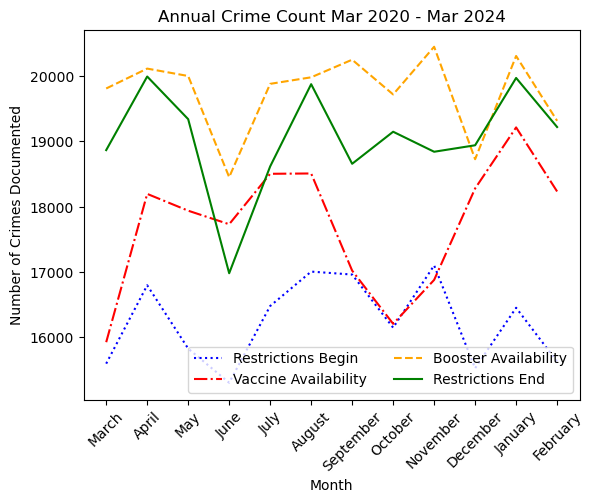

In [63]:
#x_1=sum2020["Month"]
x_1 = ["March", "April", "May", "June", "July", "August", "September", "October", "November", "December", "January", "February",]
y_1=sum2020["Total Counts"]
y_2=sum2021["Total Counts"]
y_3=sum2022["Total Counts"]
y_4=sum2023["Total Counts"]

plt.plot(x_1,y_1, color='blue', linestyle='dotted', label="Restrictions Begin")
plt.plot(x_1,y_2, color='red', linestyle='dashdot', label="Vaccine Availability")
plt.plot(x_1,y_3, color='orange', linestyle='dashed', label="Booster Availability")
plt.plot(x_1,y_4, color='green', linestyle='solid', label="Restrictions End")
plt.xticks(rotation=45)
plt.xlabel("Month")
plt.ylabel("Number of Crimes Documented")

plt.legend(loc='lower right', ncol=2)
plt.tight_layout
plt.title("Annual Crime Count Mar 2020 - Mar 2024")

#plt.axvline(("March"), color="blue")
#plt.text("March", 20300,"COVID Restrictions Begin", fontsize=8, bbox=dict(facecolor="blue", edgecolor="blue"))
plt.show()

#plt.savefig("Annual_Total_Vs_Year.pdf", bbox_inches="tight")
#stackoverflow: https://stackoverflow.com/questions/9622163/save-plot-to-image-file-instead-of-displaying-it

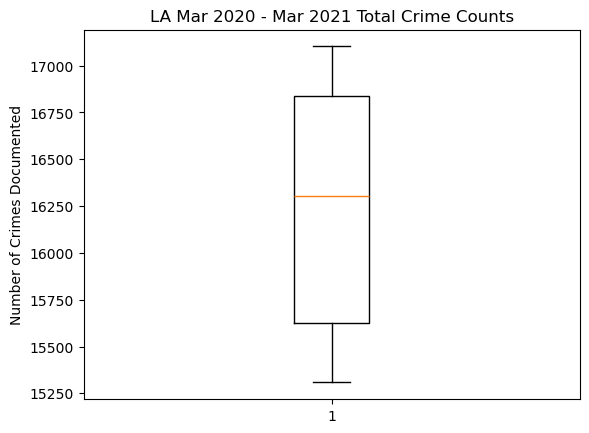

In [85]:
box2021_count = sum2020["Total Counts"]

fig1_2021, ax1_2021 = plt.subplots()
ax1_2021.set_title('LA Mar 2020 - Mar 2021 Total Crime Counts')
ax1_2021.set_ylabel('Number of Crimes Documented')
ax1_2021.boxplot(box2021_count, showfliers=True)
plt.show()

In [82]:
#2021 Total Quartiles and Outliers
quartiles2021 = box2021_count.quantile([.25,.5,.75])
lowerq2021 = quartiles2021[0.25]
upperq2021 = quartiles2021[0.75]
iqr2021 = upperq2021-lowerq2021

print(f"The lower quartile of LA Total Crimes for March 2020 - March 2021 is: {lowerq2021}")
print(f"The upper quartile of LA Total Crimes for March 2020 - March 2021 is: {upperq2021}")
print(f"The interquartile range of LA Total Crimes for March 2020 - March 2021 is: {iqr2021}")
print(f"The the median of LA Total Crimes for March 2020 - March 2021 is: {quartiles2021[0.5]} ")

lower_bound = lowerq2021 - (1.5*iqr2021)
upper_bound = upperq2021 + (1.5*iqr2021)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of LA Total Crimes for March 2020 - March 2021 is: 15623.25
The upper quartile of LA Total Crimes for March 2020 - March 2021 is: 16839.0
The interquartile range of LA Total Crimes for March 2020 - March 2021 is: 1215.75
The the median of LA Total Crimes for March 2020 - March 2021 is: 16302.0 
Values below 13799.625 could be outliers.
Values above 18662.625 could be outliers.


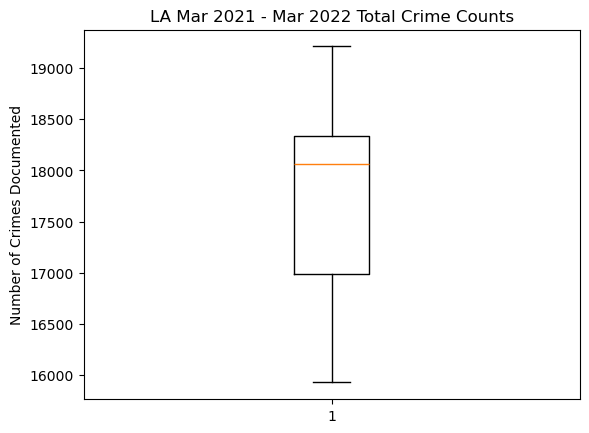

In [86]:
box2122_count = sum2021["Total Counts"]

fig1_2122, ax1_2122 = plt.subplots()
ax1_2122.set_title('LA Mar 2021 - Mar 2022 Total Crime Counts')
ax1_2122.set_ylabel('Number of Crimes Documented')
ax1_2122.boxplot(box2122_count, showfliers=True)
plt.show()

In [87]:
#2022 Total Quartiles and Outliers
quartiles2122 = box2122_count.quantile([.25,.5,.75])
lowerq2122 = quartiles2122[0.25]
upperq2122 = quartiles2122[0.75]
iqr2122 = upperq2122-lowerq2122

print(f"The lower quartile of LA Total Crimes for March 2021 - March 2022 is: {lowerq2122}")
print(f"The upper quartile of LA Total Crimes for March 2021 - March 2022 is: {upperq2122}")
print(f"The interquartile range of LA Total Crimes for March 2021 - March 2022 is: {iqr2122}")
print(f"The the median of LA Total Crimes for March 2021 - March 2022 is: {quartiles2122[0.5]} ")

lower_bound = lowerq2122 - (1.5*iqr2122)
upper_bound = upperq2122 + (1.5*iqr2122)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of LA Total Crimes for March 2021 - March 2022 is: 16986.5
The upper quartile of LA Total Crimes for March 2021 - March 2022 is: 18334.0
The interquartile range of LA Total Crimes for March 2021 - March 2022 is: 1347.5
The the median of LA Total Crimes for March 2021 - March 2022 is: 18066.5 
Values below 14965.25 could be outliers.
Values above 20355.25 could be outliers.


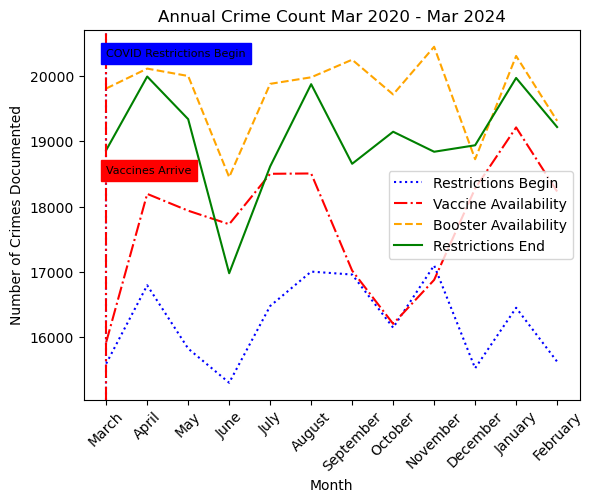

In [69]:
#tester
x_1 = ["March", "April", "May", "June", "July", "August", "September", "October", "November", "December", "January", "February",]
y_1=sum2020["Total Counts"]
y_2=sum2021["Total Counts"]
y_3=sum2022["Total Counts"]
y_4=sum2023["Total Counts"]

plt.plot(x_1,y_1, color='blue', linestyle='dotted', label="Restrictions Begin")
plt.plot(x_1,y_2, color='red', linestyle='dashdot', label="Vaccine Availability")
plt.plot(x_1,y_3, color='orange', linestyle='dashed', label="Booster Availability")
plt.plot(x_1,y_4, color='green', linestyle='solid', label="Restrictions End")
plt.xticks(rotation=45)
plt.xlabel("Month")
plt.ylabel("Number of Crimes Documented")

plt.legend(loc='best')
plt.tight_layout
plt.title("Annual Crime Count Mar 2020 - Mar 2024")

plt.axvline(("March"), color="blue", linestyle='dotted')
plt.text("March", 20300,"COVID Restrictions Begin", fontsize=8, bbox=dict(facecolor="blue", edgecolor="blue"))
plt.axvline(0, color="red", linestyle='dashdot')
plt.text(0, 18500,"Vaccines Arrive", fontsize=8, bbox=dict(facecolor="red", edgecolor="red"))
plt.show()

In [34]:
fh2021 = clean_2021.loc[(clean_2021["area_name"] == "Foothill")]

fhmar20 = fh2021.loc[(fh2021["date_occ"] >= "2020-03-01") & (fh2021["date_occ"] < "2020-04-01")]
fhmar20["Month"] = "March"
fhapr20 = fh2021.loc[(fh2021["date_occ"] >= "2020-04-01") & (fh2021["date_occ"] < "2020-05-01")]
fhapr20["Month"] = "April"
fhmay20 = fh2021.loc[(fh2021["date_occ"] >= "2020-05-01") & (fh2021["date_occ"] < "2020-06-01")]
fhmay20["Month"] = "May"
fhjun20 = fh2021.loc[(fh2021["date_occ"] >= "2020-06-01") & (fh2021["date_occ"] < "2020-07-01")]
fhjun20["Month"] = "June"
fhjul20 = fh2021.loc[(fh2021["date_occ"] >= "2020-07-01") & (fh2021["date_occ"] < "2020-08-01")]
fhjul20["Month"] = "July"
fhaug20 = fh2021.loc[(fh2021["date_occ"] >= "2020-08-01") & (fh2021["date_occ"] < "2020-09-01")]
fhaug20["Month"] = "August"
fhsep20 = fh2021.loc[(fh2021["date_occ"] >= "2020-09-01") & (fh2021["date_occ"] < "2020-10-01")]
fhsep20["Month"] = "September"
fhoct20 = fh2021.loc[(fh2021["date_occ"] >= "2020-10-01") & (fh2021["date_occ"] < "2020-11-01")]
fhoct20["Month"] = "October"
fhnov20 = fh2021.loc[(fh2021["date_occ"] >= "2020-11-01") & (fh2021["date_occ"] < "2020-12-01")]
fhnov20["Month"] = "November"
fhdec20 = fh2021.loc[(fh2021["date_occ"] >= "2020-12-01") & (fh2021["date_occ"] < "2021-01-01")]
fhdec20["Month"] = "December"
fhjan21 = fh2021.loc[(fh2021["date_occ"] >= "2021-01-01") & (fh2021["date_occ"] < "2021-02-01")]
fhjan21["Month"] = "January"
fhfeb21 = fh2021.loc[(fh2021["date_occ"] >= "2021-02-01") & (fh2021["date_occ"] < "2021-03-01")]
fhfeb21["Month"] = "February"

fhmar20.reset_index(drop=True, inplace=True)
fhapr20.reset_index(drop=True, inplace=True)
fhmay20.reset_index(drop=True, inplace=True)
fhjun20.reset_index(drop=True, inplace=True)
fhjul20.reset_index(drop=True, inplace=True)
fhaug20.reset_index(drop=True, inplace=True)
fhsep20.reset_index(drop=True, inplace=True)
fhoct20.reset_index(drop=True, inplace=True)
fhnov20.reset_index(drop=True, inplace=True)
fhdec20.reset_index(drop=True, inplace=True)
fhjan21.reset_index(drop=True, inplace=True)
fhfeb21.reset_index(drop=True, inplace=True)



fhannual2021df = pd.concat([fhmar20, fhapr20, fhmay20, fhjun20, fhjul20, fhaug20, fhsep20, fhoct20, fhnov20, fhdec20, fhjan21, fhfeb21], ignore_index=False, axis=0)

fhannual2021df.head()

C:\Users\yumai\AppData\Local\Temp\ipykernel_31264\3381644240.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fhmar20["Month"] = "March"
C:\Users\yumai\AppData\Local\Temp\ipykernel_31264\3381644240.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fhapr20["Month"] = "April"
C:\Users\yumai\AppData\Local\Temp\ipykernel_31264\3381644240.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats 

,date_occ,area_name,crm_cd,crm_cd_2,crm_cd_3,crm_cd_4,vict_age,vict_sex,vict_descent,premis_desc,lat,lon,weapons_used_cd,Year,Month
0,2020-03-30,Foothill,815.0,815.0,NaN,NaN,6.0,F,H,SINGLE FAMILY DWELLING,34.2838,-118.3933,NaN,Q1,March
1,2020-03-01,Foothill,354.0,NaN,NaN,NaN,65.0,M,H,SINGLE FAMILY DWELLING,34.2537,-118.4210,NaN,Q1,March
2,2020-03-04,Foothill,860.0,NaN,NaN,NaN,7.0,F,H,SINGLE FAMILY DWELLING,34.2647,-118.4384,NaN,Q1,March
3,2020-03-01,Foothill,860.0,NaN,NaN,NaN,40.0,F,O,SINGLE FAMILY DWELLING,34.2518,-118.3007,NaN,Q1,March
4,2020-03-30,Foothill,815.0,815.0,NaN,NaN,5.0,F,H,SINGLE FAMILY DWELLING,34.2838,-118.3933,NaN,Q1,March


In [35]:
fh2022 = clean_2122.loc[(clean_2122["area_name"] == "Foothill")]

fhmar21 = fh2022.loc[(fh2022["date_occ"] >= "2021-03-01") & (fh2022["date_occ"] < "2021-04-01")]
fhmar21["Month"] = "March"
fhapr21 = fh2022.loc[(fh2022["date_occ"] >= "2021-04-01") & (fh2022["date_occ"] < "2021-05-01")]
fhapr21["Month"] = "April"
fhmay21 = fh2022.loc[(fh2022["date_occ"] >= "2021-05-01") & (fh2022["date_occ"] < "2021-06-01")]
fhmay21["Month"] = "May"
fhjun21 = fh2022.loc[(fh2022["date_occ"] >= "2021-06-01") & (fh2022["date_occ"] < "2021-07-01")]
fhjun21["Month"] = "June"
fhjul21 = fh2022.loc[(fh2022["date_occ"] >= "2021-07-01") & (fh2022["date_occ"] < "2021-08-01")]
fhjul21["Month"] = "July"
fhaug21 = fh2022.loc[(fh2022["date_occ"] >= "2021-08-01") & (fh2022["date_occ"] < "2021-09-01")]
fhaug21["Month"] = "August"
fhsep21 = fh2022.loc[(fh2022["date_occ"] >= "2021-09-01") & (fh2022["date_occ"] < "2021-10-01")]
fhsep21["Month"] = "September"
fhoct21 = fh2022.loc[(fh2022["date_occ"] >= "2021-10-01") & (fh2022["date_occ"] < "2021-11-01")]
fhoct21["Month"] = "October"
fhnov21 = fh2022.loc[(fh2022["date_occ"] >= "2021-11-01") & (fh2022["date_occ"] < "2021-12-01")]
fhnov21["Month"] = "November"
fhdec21 = fh2022.loc[(fh2022["date_occ"] >= "2021-12-01") & (fh2022["date_occ"] < "2022-01-01")]
fhdec21["Month"] = "December"
fhjan22 = fh2022.loc[(fh2022["date_occ"] >= "2022-01-01") & (fh2022["date_occ"] < "2022-02-01")]
fhjan22["Month"] = "January"
fhfeb22 = fh2022.loc[(fh2022["date_occ"] >= "2022-02-01") & (fh2022["date_occ"] < "2022-03-01")]
fhfeb22["Month"] = "February"

fhmar21.reset_index(drop=True, inplace=True)
fhapr21.reset_index(drop=True, inplace=True)
fhmay21.reset_index(drop=True, inplace=True)
fhjun21.reset_index(drop=True, inplace=True)
fhjul21.reset_index(drop=True, inplace=True)
fhaug21.reset_index(drop=True, inplace=True)
fhsep21.reset_index(drop=True, inplace=True)
fhoct21.reset_index(drop=True, inplace=True)
fhnov21.reset_index(drop=True, inplace=True)
fhdec21.reset_index(drop=True, inplace=True)
fhjan22.reset_index(drop=True, inplace=True)
fhfeb22.reset_index(drop=True, inplace=True)



fhannual2022df = pd.concat([fhmar21, fhapr21, fhmay21, fhjun21, fhjul21, fhaug21, fhsep21, fhoct21, fhnov21, fhdec21, fhjan22, fhfeb22], ignore_index=False, axis=0)

fhannual2022df.head()

C:\Users\yumai\AppData\Local\Temp\ipykernel_31264\1171860079.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fhmar21["Month"] = "March"
C:\Users\yumai\AppData\Local\Temp\ipykernel_31264\1171860079.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fhapr21["Month"] = "April"
C:\Users\yumai\AppData\Local\Temp\ipykernel_31264\1171860079.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats 

,date_occ,area_name,crm_cd,crm_cd_2,crm_cd_3,crm_cd_4,vict_age,vict_sex,vict_descent,premis_desc,lat,lon,weapons_used_cd,Year,Month
0,2021-03-29,Foothill,510.0,NaN,NaN,NaN,0.0,NaN,NaN,PARKING LOT,34.2375,-118.3926,NaN,Q2,March
1,2021-03-30,Foothill,220.0,NaN,NaN,NaN,31.0,F,H,SIDEWALK,34.2816,-118.4073,NaN,Q2,March
2,2021-03-15,Foothill,745.0,NaN,NaN,NaN,45.0,F,H,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",34.2297,-118.3897,NaN,Q2,March
3,2021-03-19,Foothill,442.0,NaN,NaN,NaN,56.0,M,O,MINI-MART,34.2598,-118.3224,NaN,Q2,March
4,2021-03-04,Foothill,230.0,NaN,NaN,NaN,45.0,M,O,SINGLE FAMILY DWELLING,34.2489,-118.2839,NaN,Q2,March


In [36]:
fh2023 = clean_2223.loc[(clean_2223["area_name"] == "Foothill")]

fhmar22 = fh2023.loc[(fh2023["date_occ"] >= "2022-03-01") & (fh2023["date_occ"] < "2022-04-01")]
fhmar22["Month"] = "March"
fhapr22 = fh2023.loc[(fh2023["date_occ"] >= "2022-04-01") & (fh2023["date_occ"] < "2022-05-01")]
fhapr22["Month"] = "April"
fhmay22 = fh2023.loc[(fh2023["date_occ"] >= "2022-05-01") & (fh2023["date_occ"] < "2022-06-01")]
fhmay22["Month"] = "May"
fhjun22 = fh2023.loc[(fh2023["date_occ"] >= "2022-06-01") & (fh2023["date_occ"] < "2022-07-01")]
fhjun22["Month"] = "June"
fhjul22 = fh2023.loc[(fh2023["date_occ"] >= "2022-07-01") & (fh2023["date_occ"] < "2022-08-01")]
fhjul22["Month"] = "July"
fhaug22 = fh2023.loc[(fh2023["date_occ"] >= "2022-08-01") & (fh2023["date_occ"] < "2022-09-01")]
fhaug22["Month"] = "August"
fhsep22 = fh2023.loc[(fh2023["date_occ"] >= "2022-09-01") & (fh2023["date_occ"] < "2022-10-01")]
fhsep22["Month"] = "September"
fhoct22 = fh2023.loc[(fh2023["date_occ"] >= "2022-10-01") & (fh2023["date_occ"] < "2022-11-01")]
fhoct22["Month"] = "October"
fhnov22 = fh2023.loc[(fh2023["date_occ"] >= "2022-11-01") & (fh2023["date_occ"] < "2022-12-01")]
fhnov22["Month"] = "November"
fhdec22 = fh2023.loc[(fh2023["date_occ"] >= "2022-12-01") & (fh2023["date_occ"] < "2023-01-01")]
fhdec22["Month"] = "December"
fhjan23 = fh2023.loc[(fh2023["date_occ"] >= "2023-01-01") & (fh2023["date_occ"] < "2023-02-01")]
fhjan23["Month"] = "January"
fhfeb23 = fh2023.loc[(fh2023["date_occ"] >= "2023-02-01") & (fh2023["date_occ"] < "2023-03-01")]
fhfeb23["Month"] = "February"

fhmar22.reset_index(drop=True, inplace=True)
fhapr22.reset_index(drop=True, inplace=True)
fhmay22.reset_index(drop=True, inplace=True)
fhjun22.reset_index(drop=True, inplace=True)
fhjul22.reset_index(drop=True, inplace=True)
fhaug22.reset_index(drop=True, inplace=True)
fhsep22.reset_index(drop=True, inplace=True)
fhoct22.reset_index(drop=True, inplace=True)
fhnov22.reset_index(drop=True, inplace=True)
fhdec22.reset_index(drop=True, inplace=True)
fhjan23.reset_index(drop=True, inplace=True)
fhfeb23.reset_index(drop=True, inplace=True)



fhannual2023df = pd.concat([fhmar22, fhapr22, fhmay22, fhjun22, fhjul22, fhaug22, fhsep22, fhoct22, fhnov22, fhdec22, fhjan23, fhfeb23], ignore_index=False, axis=0)

fhannual2023df.head()

C:\Users\yumai\AppData\Local\Temp\ipykernel_31264\2948630097.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fhmar22["Month"] = "March"
C:\Users\yumai\AppData\Local\Temp\ipykernel_31264\2948630097.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fhapr22["Month"] = "April"
C:\Users\yumai\AppData\Local\Temp\ipykernel_31264\2948630097.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats 

,date_occ,area_name,crm_cd,crm_cd_2,crm_cd_3,crm_cd_4,vict_age,vict_sex,vict_descent,premis_desc,lat,lon,weapons_used_cd,Year,Month
0,2022-03-27,Foothill,903.0,NaN,NaN,NaN,51.0,F,W,"VEHICLE, PASSENGER/TRUCK",34.2503,-118.2904,NaN,Q3,March
1,2022-03-20,Foothill,626.0,NaN,NaN,NaN,57.0,M,H,SINGLE FAMILY DWELLING,34.2498,-118.2805,NaN,Q3,March
2,2022-03-01,Foothill,330.0,NaN,NaN,NaN,64.0,M,H,STREET,34.2574,-118.3010,NaN,Q3,March
3,2022-03-06,Foothill,420.0,NaN,NaN,NaN,0.0,NaN,NaN,STREET,34.2193,-118.3747,NaN,Q3,March
4,2022-03-14,Foothill,236.0,NaN,NaN,NaN,17.0,F,H,HIGH SCHOOL,34.2606,-118.2979,NaN,Q3,March


In [37]:
fh2024 = clean_2324.loc[(clean_2324["area_name"] == "Foothill")]

fhmar23 = fh2024.loc[(fh2024["date_occ"] >= "2023-03-01") & (fh2024["date_occ"] < "2023-04-01")]
fhmar23["Month"] = "March"
fhapr23 = fh2024.loc[(fh2024["date_occ"] >= "2023-04-01") & (fh2024["date_occ"] < "2023-05-01")]
fhapr23["Month"] = "April"
fhmay23 = fh2024.loc[(fh2024["date_occ"] >= "2023-05-01") & (fh2024["date_occ"] < "2023-06-01")]
fhmay23["Month"] = "May"
fhjun23 = fh2024.loc[(fh2024["date_occ"] >= "2023-06-01") & (fh2024["date_occ"] < "2023-07-01")]
fhjun23["Month"] = "June"
fhjul23 = fh2024.loc[(fh2024["date_occ"] >= "2023-07-01") & (fh2024["date_occ"] < "2023-08-01")]
fhjul23["Month"] = "July"
fhaug23 = fh2024.loc[(fh2024["date_occ"] >= "2023-08-01") & (fh2024["date_occ"] < "2023-09-01")]
fhaug23["Month"] = "August"
fhsep23 = fh2024.loc[(fh2024["date_occ"] >= "2023-09-01") & (fh2024["date_occ"] < "2023-10-01")]
fhsep23["Month"] = "September"
fhoct23 = fh2024.loc[(fh2024["date_occ"] >= "2023-10-01") & (fh2024["date_occ"] < "2023-11-01")]
fhoct23["Month"] = "October"
fhnov23 = fh2024.loc[(fh2024["date_occ"] >= "2023-11-01") & (fh2024["date_occ"] < "2023-12-01")]
fhnov23["Month"] = "November"
fhdec23 = fh2024.loc[(fh2024["date_occ"] >= "2023-12-01") & (fh2024["date_occ"] < "2024-01-01")]
fhdec23["Month"] = "December"
fhjan24 = fh2024.loc[(fh2024["date_occ"] >= "2024-01-01") & (fh2024["date_occ"] < "2024-02-01")]
fhjan24["Month"] = "January"
fhfeb24 = fh2024.loc[(fh2024["date_occ"] >= "2024-02-01") & (fh2024["date_occ"] < "2024-03-01")]
fhfeb24["Month"] = "February"

fhmar23.reset_index(drop=True, inplace=True)
fhapr23.reset_index(drop=True, inplace=True)
fhmay23.reset_index(drop=True, inplace=True)
fhjun23.reset_index(drop=True, inplace=True)
fhjul23.reset_index(drop=True, inplace=True)
fhaug23.reset_index(drop=True, inplace=True)
fhsep23.reset_index(drop=True, inplace=True)
fhoct23.reset_index(drop=True, inplace=True)
fhnov23.reset_index(drop=True, inplace=True)
fhdec23.reset_index(drop=True, inplace=True)
fhjan24.reset_index(drop=True, inplace=True)
fhfeb24.reset_index(drop=True, inplace=True)



fhannual2024df = pd.concat([fhmar23, fhapr23, fhmay23, fhjun23, fhjul23, fhaug23, fhsep23, fhoct23, fhnov23, fhdec23, fhjan24, fhfeb24], ignore_index=False, axis=0)

fhannual2024df.head()

C:\Users\yumai\AppData\Local\Temp\ipykernel_31264\2372653943.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fhmar23["Month"] = "March"
C:\Users\yumai\AppData\Local\Temp\ipykernel_31264\2372653943.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fhapr23["Month"] = "April"
C:\Users\yumai\AppData\Local\Temp\ipykernel_31264\2372653943.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats 

,date_occ,area_name,crm_cd,crm_cd_2,crm_cd_3,crm_cd_4,vict_age,vict_sex,vict_descent,premis_desc,lat,lon,weapons_used_cd,Year,Month
0,2023-03-22,Foothill,901.0,NaN,NaN,NaN,44.0,F,O,SINGLE FAMILY DWELLING,34.2298,-118.3938,NaN,Q4,March
1,2023-03-10,Foothill,740.0,NaN,NaN,NaN,63.0,F,H,SINGLE FAMILY DWELLING,34.2610,-118.4345,NaN,Q4,March
2,2023-03-19,Foothill,310.0,NaN,NaN,NaN,84.0,F,W,SINGLE FAMILY DWELLING,34.2389,-118.2727,NaN,Q4,March
3,2023-03-12,Foothill,420.0,NaN,NaN,NaN,0.0,NaN,NaN,STREET,34.2669,-118.3027,NaN,Q4,March
4,2023-03-08,Foothill,624.0,NaN,NaN,NaN,66.0,F,W,OTHER PREMISE,34.2200,-118.3977,NaN,Q4,March


In [38]:
fhannual2021 = fhannual2021df.groupby(["Month"])["date_occ"].count().reset_index(name="Total Counts")
fhannual2022 = fhannual2022df.groupby(["Month"])["date_occ"].count().reset_index(name="Total Counts")
fhannual2023 = fhannual2023df.groupby(["Month"])["date_occ"].count().reset_index(name="Total Counts")
fhannual2024 = fhannual2024df.groupby(["Month"])["date_occ"].count().reset_index(name="Total Counts")
list(fhannual2024.columns)

['Month', 'Total Counts']

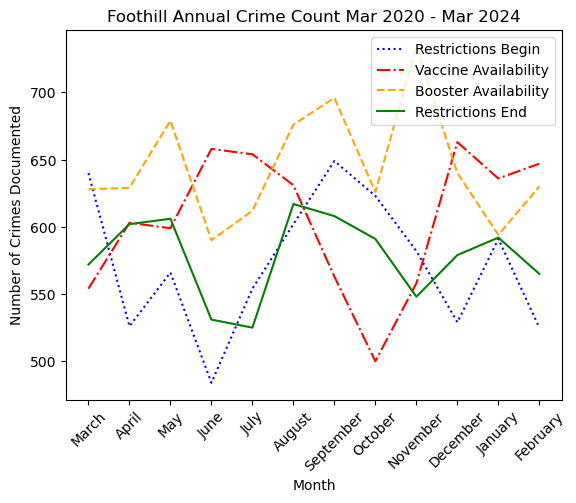

In [42]:
xfh1= ["March", "April", "May", "June", "July", "August", "September", "October", "November", "December", "January", "February"]
yfh1=fhannual2021["Total Counts"]
yfh2=fhannual2022["Total Counts"]
yfh3=fhannual2023["Total Counts"]
yfh4=fhannual2024["Total Counts"]

plt.plot(xfh1,yfh1, color='blue', linestyle='dotted', label="Restrictions Begin")
plt.plot(xfh1,yfh2, color='red', linestyle='dashdot', label="Vaccine Availability")
plt.plot(xfh1,yfh3, color='orange', linestyle='dashed', label="Booster Availability")
plt.plot(xfh1,yfh4, color='green', linestyle='solid', label="Restrictions End")
plt.xticks(rotation=45)
plt.xlabel("Month")
plt.ylabel("Number of Crimes Documented")

plt.legend(loc='best')
plt.tight_layout

plt.title("Foothill Annual Crime Count Mar 2020 - Mar 2024")
#plt.savefig("Foothill_Total_Vs_Year.pdf", bbox_inches="tight")
plt.show()

In [43]:
c2021 = clean_2021.loc[(clean_2021["area_name"] == "Central")]

cmar20 = c2021.loc[(c2021["date_occ"] >= "2020-03-01") & (c2021["date_occ"] < "2020-04-01")]
cmar20["Month"] = "March"
capr20 = c2021.loc[(c2021["date_occ"] >= "2020-04-01") & (c2021["date_occ"] < "2020-05-01")]
capr20["Month"] = "April"
cmay20 = c2021.loc[(c2021["date_occ"] >= "2020-05-01") & (c2021["date_occ"] < "2020-06-01")]
cmay20["Month"] = "May"
cjun20 = c2021.loc[(c2021["date_occ"] >= "2020-06-01") & (c2021["date_occ"] < "2020-07-01")]
cjun20["Month"] = "June"
cjul20 = c2021.loc[(c2021["date_occ"] >= "2020-07-01") & (c2021["date_occ"] < "2020-08-01")]
cjul20["Month"] = "July"
caug20 = c2021.loc[(c2021["date_occ"] >= "2020-08-01") & (c2021["date_occ"] < "2020-09-01")]
caug20["Month"] = "August"
csep20 = c2021.loc[(c2021["date_occ"] >= "2020-09-01") & (c2021["date_occ"] < "2020-10-01")]
csep20["Month"] = "September"
coct20 = c2021.loc[(c2021["date_occ"] >= "2020-10-01") & (c2021["date_occ"] < "2020-11-01")]
coct20["Month"] = "October"
cnov20 = c2021.loc[(c2021["date_occ"] >= "2020-11-01") & (c2021["date_occ"] < "2020-12-01")]
cnov20["Month"] = "November"
cdec20 = c2021.loc[(c2021["date_occ"] >= "2020-12-01") & (c2021["date_occ"] < "2021-01-01")]
cdec20["Month"] = "December"
cjan21 = c2021.loc[(c2021["date_occ"] >= "2021-01-01") & (c2021["date_occ"] < "2021-02-01")]
cjan21["Month"] = "January"
cfeb21 = c2021.loc[(c2021["date_occ"] >= "2021-02-01") & (c2021["date_occ"] < "2021-03-01")]
cfeb21["Month"] = "February"

cmar20.reset_index(drop=True, inplace=True)
capr20.reset_index(drop=True, inplace=True)
cmay20.reset_index(drop=True, inplace=True)
cjun20.reset_index(drop=True, inplace=True)
cjul20.reset_index(drop=True, inplace=True)
caug20.reset_index(drop=True, inplace=True)
csep20.reset_index(drop=True, inplace=True)
coct20.reset_index(drop=True, inplace=True)
cnov20.reset_index(drop=True, inplace=True)
cdec20.reset_index(drop=True, inplace=True)
cjan21.reset_index(drop=True, inplace=True)
cfeb21.reset_index(drop=True, inplace=True)



c2021df = pd.concat([cmar20, capr20, cmay20, cjun20, cjul20, caug20, csep20, coct20, cnov20, cdec20, cjan21, cfeb21], ignore_index=False, axis=0)

c2021df.head()

C:\Users\yumai\AppData\Local\Temp\ipykernel_31264\1461788336.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cmar20["Month"] = "March"
C:\Users\yumai\AppData\Local\Temp\ipykernel_31264\1461788336.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  capr20["Month"] = "April"
C:\Users\yumai\AppData\Local\Temp\ipykernel_31264\1461788336.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in

,date_occ,area_name,crm_cd,crm_cd_2,crm_cd_3,crm_cd_4,vict_age,vict_sex,vict_descent,premis_desc,lat,lon,weapons_used_cd,Year,Month
0,2020-03-20,Central,668.0,NaN,NaN,NaN,60.0,M,O,OFFICE BUILDING/OFFICE,34.0537,-118.2523,NaN,Q1,March
1,2020-03-23,Central,354.0,NaN,NaN,NaN,48.0,M,B,"BUS, SCHOOL, CHURCH",34.0495,-118.2459,NaN,Q1,March
2,2020-03-13,Central,668.0,NaN,NaN,NaN,0.0,X,X,HIGH SCHOOL,34.0595,-118.2451,NaN,Q1,March
3,2020-03-07,Central,354.0,NaN,NaN,NaN,32.0,M,B,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",34.0569,-118.2540,NaN,Q1,March
4,2020-03-23,Central,745.0,NaN,NaN,NaN,0.0,X,X,"VEHICLE, PASSENGER/TRUCK",34.0471,-118.2491,NaN,Q1,March


In [49]:
c2022 = clean_2122.loc[(clean_2122["area_name"] == "Central")]

cmar21 = c2022.loc[(c2022["date_occ"] >= "2021-03-01") & (c2022["date_occ"] < "2021-04-01")]
cmar21["Month"] = "March"
capr21 = c2022.loc[(c2022["date_occ"] >= "2021-04-01") & (c2022["date_occ"] < "2021-05-01")]
capr21["Month"] = "April"
cmay21 = c2022.loc[(c2022["date_occ"] >= "2021-05-01") & (c2022["date_occ"] < "2021-06-01")]
cmay21["Month"] = "May"
cjun21 = c2022.loc[(c2022["date_occ"] >= "2021-06-01") & (c2022["date_occ"] < "2021-07-01")]
cjun21["Month"] = "June"
cjul21 = c2022.loc[(c2022["date_occ"] >= "2021-07-01") & (c2022["date_occ"] < "2021-08-01")]
cjul21["Month"] = "July"
caug21 = c2022.loc[(c2022["date_occ"] >= "2021-08-01") & (c2022["date_occ"] < "2021-09-01")]
caug21["Month"] = "August"
csep21 = c2022.loc[(c2022["date_occ"] >= "2021-09-01") & (c2022["date_occ"] < "2021-10-01")]
csep21["Month"] = "September"
coct21 = c2022.loc[(c2022["date_occ"] >= "2021-10-01") & (c2022["date_occ"] < "2021-11-01")]
coct21["Month"] = "October"
cnov21 = c2022.loc[(c2022["date_occ"] >= "2021-11-01") & (c2022["date_occ"] < "2021-12-01")]
cnov21["Month"] = "November"
cdec21 = c2022.loc[(c2022["date_occ"] >= "2021-12-01") & (c2022["date_occ"] < "2022-01-01")]
cdec21["Month"] = "December"
cjan22 = c2022.loc[(c2022["date_occ"] >= "2022-01-01") & (c2022["date_occ"] < "2022-02-01")]
cjan22["Month"] = "January"
cfeb22 = c2022.loc[(c2022["date_occ"] >= "2022-02-01") & (c2022["date_occ"] < "2022-03-01")]
cfeb22["Month"] = "February"

cmar21.reset_index(drop=True, inplace=True)
capr21.reset_index(drop=True, inplace=True)
cmay21.reset_index(drop=True, inplace=True)
cjun21.reset_index(drop=True, inplace=True)
cjul21.reset_index(drop=True, inplace=True)
caug21.reset_index(drop=True, inplace=True)
csep21.reset_index(drop=True, inplace=True)
coct21.reset_index(drop=True, inplace=True)
cnov21.reset_index(drop=True, inplace=True)
cdec21.reset_index(drop=True, inplace=True)
cjan22.reset_index(drop=True, inplace=True)
cfeb22.reset_index(drop=True, inplace=True)



c2022df = pd.concat([cmar21, capr21, cmay21, cjun21, cjul21, caug21, csep21, coct21, cnov21, cdec21, cjan22, cfeb22], ignore_index=False, axis=0)

c2022df.head()

C:\Users\yumai\AppData\Local\Temp\ipykernel_31264\2040882465.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cmar21["Month"] = "March"
C:\Users\yumai\AppData\Local\Temp\ipykernel_31264\2040882465.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  capr21["Month"] = "April"
C:\Users\yumai\AppData\Local\Temp\ipykernel_31264\2040882465.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in

,date_occ,area_name,crm_cd,crm_cd_2,crm_cd_3,crm_cd_4,vict_age,vict_sex,vict_descent,premis_desc,lat,lon,weapons_used_cd,Year,Month
0,2021-03-21,Central,310.0,NaN,NaN,NaN,38.0,M,W,OFFICE BUILDING/OFFICE,34.0495,-118.2546,NaN,Q2,March
1,2021-03-21,Central,440.0,NaN,NaN,NaN,23.0,M,H,"COFFEE SHOP (STARBUCKS, COFFEE BEAN, PEET'S, E...",34.0503,-118.2434,NaN,Q2,March
2,2021-03-01,Central,930.0,NaN,NaN,NaN,37.0,F,H,OFFICE BUILDING/OFFICE,34.0607,-118.2494,NaN,Q2,March
3,2021-03-13,Central,510.0,NaN,NaN,NaN,0.0,NaN,NaN,PARKING LOT,34.0521,-118.2556,NaN,Q2,March
4,2021-03-21,Central,330.0,NaN,NaN,NaN,32.0,M,B,STREET,34.0391,-118.2582,NaN,Q2,March


In [50]:
c2023 = clean_2223.loc[(clean_2223["area_name"] == "Central")]

cmar22 = c2023.loc[(c2023["date_occ"] >= "2022-03-01") & (c2023["date_occ"] < "2022-04-01")]
cmar22["Month"] = "March"
capr22 = c2023.loc[(c2023["date_occ"] >= "2022-04-01") & (c2023["date_occ"] < "2022-05-01")]
capr22["Month"] = "April"
cmay22 = c2023.loc[(c2023["date_occ"] >= "2022-05-01") & (c2023["date_occ"] < "2022-06-01")]
cmay22["Month"] = "May"
cjun22 = c2023.loc[(c2023["date_occ"] >= "2022-06-01") & (c2023["date_occ"] < "2022-07-01")]
cjun22["Month"] = "June"
cjul22 = c2023.loc[(c2023["date_occ"] >= "2022-07-01") & (c2023["date_occ"] < "2022-08-01")]
cjul22["Month"] = "July"
caug22 = c2023.loc[(c2023["date_occ"] >= "2022-08-01") & (c2023["date_occ"] < "2022-09-01")]
caug22["Month"] = "August"
csep22 = c2023.loc[(c2023["date_occ"] >= "2022-09-01") & (c2023["date_occ"] < "2022-10-01")]
csep22["Month"] = "September"
coct22 = c2023.loc[(c2023["date_occ"] >= "2022-10-01") & (c2023["date_occ"] < "2022-11-01")]
coct22["Month"] = "October"
cnov22 = c2023.loc[(c2023["date_occ"] >= "2022-11-01") & (c2023["date_occ"] < "2022-12-01")]
cnov22["Month"] = "November"
cdec22 = c2023.loc[(c2023["date_occ"] >= "2022-12-01") & (c2023["date_occ"] < "2023-01-01")]
cdec22["Month"] = "December"
cjan23 = c2023.loc[(c2023["date_occ"] >= "2023-01-01") & (c2023["date_occ"] < "2023-02-01")]
cjan23["Month"] = "January"
cfeb23 = c2023.loc[(c2023["date_occ"] >= "2023-02-01") & (c2023["date_occ"] < "2023-03-01")]
cfeb23["Month"] = "February"

cmar22.reset_index(drop=True, inplace=True)
capr22.reset_index(drop=True, inplace=True)
cmay22.reset_index(drop=True, inplace=True)
cjun22.reset_index(drop=True, inplace=True)
cjul22.reset_index(drop=True, inplace=True)
caug22.reset_index(drop=True, inplace=True)
csep22.reset_index(drop=True, inplace=True)
coct22.reset_index(drop=True, inplace=True)
cnov22.reset_index(drop=True, inplace=True)
cdec22.reset_index(drop=True, inplace=True)
cjan23.reset_index(drop=True, inplace=True)
cfeb23.reset_index(drop=True, inplace=True)



c2023df = pd.concat([cmar22, capr22, cmay22, cjun22, cjul22, caug22, csep22, coct22, cnov22, cdec22, cjan23, cfeb23], ignore_index=False, axis=0)

c2023df.head()

C:\Users\yumai\AppData\Local\Temp\ipykernel_31264\2102595041.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cmar22["Month"] = "March"
C:\Users\yumai\AppData\Local\Temp\ipykernel_31264\2102595041.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  capr22["Month"] = "April"
C:\Users\yumai\AppData\Local\Temp\ipykernel_31264\2102595041.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in

,date_occ,area_name,crm_cd,crm_cd_2,crm_cd_3,crm_cd_4,vict_age,vict_sex,vict_descent,premis_desc,lat,lon,weapons_used_cd,Year,Month
0,2022-03-15,Central,440.0,NaN,NaN,NaN,30.0,M,W,SINGLE FAMILY DWELLING,34.0439,-118.2514,NaN,Q3,March
1,2022-03-02,Central,331.0,NaN,NaN,NaN,42.0,M,W,STREET,34.0316,-118.2641,NaN,Q3,March
2,2022-03-02,Central,761.0,NaN,NaN,NaN,30.0,M,H,MTA - BLUE LINE - GRAND/LATTC,34.0338,-118.2706,NaN,Q3,March
3,2022-03-19,Central,740.0,NaN,NaN,NaN,49.0,F,H,"VEHICLE, PASSENGER/TRUCK",34.0342,-118.2636,NaN,Q3,March
4,2022-03-31,Central,330.0,NaN,NaN,NaN,20.0,F,W,PARKING LOT,34.0395,-118.2657,NaN,Q3,March


In [51]:
c2024 = clean_2324.loc[(clean_2324["area_name"] == "Central")]

cmar23 = c2024.loc[(c2024["date_occ"] >= "2023-03-01") & (c2024["date_occ"] < "2023-04-01")]
cmar23["Month"] = "March"
capr23 = c2024.loc[(c2024["date_occ"] >= "2023-04-01") & (c2024["date_occ"] < "2023-05-01")]
capr23["Month"] = "April"
cmay23 = c2024.loc[(c2024["date_occ"] >= "2023-05-01") & (c2024["date_occ"] < "2023-06-01")]
cmay23["Month"] = "May"
cjun23 = c2024.loc[(c2024["date_occ"] >= "2023-06-01") & (c2024["date_occ"] < "2023-07-01")]
cjun23["Month"] = "June"
cjul23 = c2024.loc[(c2024["date_occ"] >= "2023-07-01") & (c2024["date_occ"] < "2023-08-01")]
cjul23["Month"] = "July"
caug23 = c2024.loc[(c2024["date_occ"] >= "2023-08-01") & (c2024["date_occ"] < "2023-09-01")]
caug23["Month"] = "August"
csep23 = c2024.loc[(c2024["date_occ"] >= "2023-09-01") & (c2024["date_occ"] < "2023-10-01")]
csep23["Month"] = "September"
coct23 = c2024.loc[(c2024["date_occ"] >= "2023-10-01") & (c2024["date_occ"] < "2023-11-01")]
coct23["Month"] = "October"
cnov23 = c2024.loc[(c2024["date_occ"] >= "2023-11-01") & (c2024["date_occ"] < "2023-12-01")]
cnov23["Month"] = "November"
cdec23 = c2024.loc[(c2024["date_occ"] >= "2023-12-01") & (c2024["date_occ"] < "2024-01-01")]
cdec23["Month"] = "December"
cjan24 = c2024.loc[(c2024["date_occ"] >= "2024-01-01") & (c2024["date_occ"] < "2024-02-01")]
cjan24["Month"] = "January"
cfeb24 = c2024.loc[(c2024["date_occ"] >= "2024-02-01") & (c2024["date_occ"] < "2024-03-01")]
cfeb24["Month"] = "February"

cmar23.reset_index(drop=True, inplace=True)
capr23.reset_index(drop=True, inplace=True)
cmay23.reset_index(drop=True, inplace=True)
cjun23.reset_index(drop=True, inplace=True)
cjul23.reset_index(drop=True, inplace=True)
caug23.reset_index(drop=True, inplace=True)
csep23.reset_index(drop=True, inplace=True)
coct23.reset_index(drop=True, inplace=True)
cnov23.reset_index(drop=True, inplace=True)
cdec23.reset_index(drop=True, inplace=True)
cjan24.reset_index(drop=True, inplace=True)
cfeb24.reset_index(drop=True, inplace=True)



c2024df = pd.concat([cmar23, capr23, cmay23, cjun23, cjul23, caug23, csep23, coct23, cnov23, cdec23, cjan24, cfeb24], ignore_index=False, axis=0)

c2024df.head()

C:\Users\yumai\AppData\Local\Temp\ipykernel_31264\1995525813.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cmar23["Month"] = "March"
C:\Users\yumai\AppData\Local\Temp\ipykernel_31264\1995525813.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  capr23["Month"] = "April"
C:\Users\yumai\AppData\Local\Temp\ipykernel_31264\1995525813.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in

,date_occ,area_name,crm_cd,crm_cd_2,crm_cd_3,crm_cd_4,vict_age,vict_sex,vict_descent,premis_desc,lat,lon,weapons_used_cd,Year,Month
0,2023-03-21,Central,230.0,NaN,NaN,NaN,52.0,F,W,SIDEWALK,34.0569,-118.2540,NaN,Q4,March
1,2023-03-30,Central,624.0,NaN,NaN,NaN,26.0,M,A,CLOTHING STORE,34.0483,-118.2631,NaN,Q4,March
2,2023-03-09,Central,354.0,NaN,NaN,NaN,33.0,F,B,SINGLE RESIDENCE OCCUPANCY (SRO'S) LOCATIONS,34.0448,-118.2474,NaN,Q4,March
3,2023-03-13,Central,210.0,NaN,NaN,NaN,67.0,M,B,STREET,34.0449,-118.2528,NaN,Q4,March
4,2023-03-27,Central,231.0,998.0,NaN,NaN,28.0,M,H,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",34.0503,-118.2434,NaN,Q4,March


In [52]:
c2021 = c2021df.groupby(["Month"])["date_occ"].count().reset_index(name="Total Counts")
c2022 = c2022df.groupby(["Month"])["date_occ"].count().reset_index(name="Total Counts")
c2023 = c2023df.groupby(["Month"])["date_occ"].count().reset_index(name="Total Counts")
c2024 = c2024df.groupby(["Month"])["date_occ"].count().reset_index(name="Total Counts")
list(c2024.columns)

['Month', 'Total Counts']

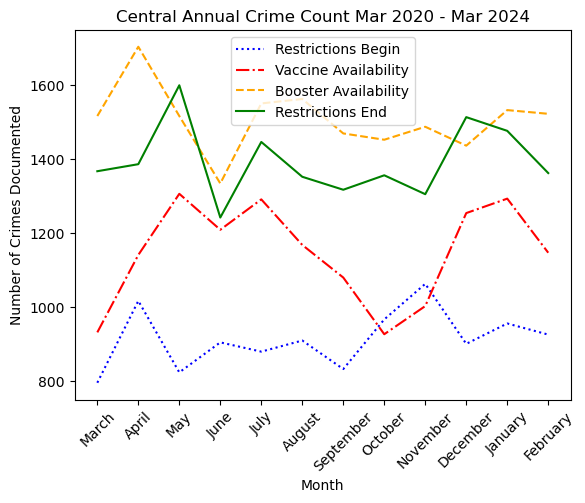

In [56]:
xc1= ["March", "April", "May", "June", "July", "August", "September", "October", "November", "December", "January", "February"]
yc1=c2021["Total Counts"]
yc2=c2022["Total Counts"]
yc3=c2023["Total Counts"]
yc4=c2024["Total Counts"]

plt.plot(xc1,yc1, color='blue', linestyle='dotted', label="Restrictions Begin")
plt.plot(xc1,yc2, color='red', linestyle='dashdot', label="Vaccine Availability")
plt.plot(xc1,yc3, color='orange', linestyle='dashed', label="Booster Availability")
plt.plot(xc1,yc4, color='green', linestyle='solid', label="Restrictions End")
plt.xticks(rotation=45)
plt.xlabel("Month")
plt.ylabel("Number of Crimes Documented")

plt.legend(loc='best')
plt.tight_layout

plt.title("Central Annual Crime Count Mar 2020 - Mar 2024")
#plt.savefig("Central_Total_Vs_Year.jpg", bbox_inches="tight")
plt.show()

In [75]:
cen2021 = clean_2021.loc[(clean_2021["area_name"] == "Central")]
sev2021 = clean_2021.loc[(clean_2021["area_name"] == "77th Street")]
pac2021 = clean_2021.loc[(clean_2021["area_name"] == "Pacific")]
sou2021 = clean_2021.loc[(clean_2021["area_name"] == "Southwest")]
hol2021 = clean_2021.loc[(clean_2021["area_name"] == "Hollywood")]

cen2021.reset_index(drop=True, inplace=True)
sev2021.reset_index(drop=True, inplace=True)
pac2021.reset_index(drop=True, inplace=True)
sou2021.reset_index(drop=True, inplace=True)
hol2021.reset_index(drop=True, inplace=True)


top2021df = pd.concat([cen2021, sev2021, pac2021, sou2021, hol2021], ignore_index=False, axis=0)

top2021df["area_name"] = "Top"
top2021df



,date_occ,area_name,crm_cd,crm_cd_2,crm_cd_3,crm_cd_4,vict_age,vict_sex,vict_descent,premis_desc,lat,lon,weapons_used_cd,Year
0,2020-07-03,Top,354.0,NaN,NaN,NaN,25.0,M,H,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",34.0415,-118.2620,NaN,Q1
1,2020-07-01,Top,354.0,NaN,NaN,NaN,22.0,F,B,CYBERSPACE,34.0466,-118.2590,NaN,Q1
2,2020-12-20,Top,341.0,NaN,NaN,NaN,0.0,X,X,SIDEWALK,34.0403,-118.2421,NaN,Q1
3,2020-08-27,Top,236.0,NaN,NaN,NaN,59.0,F,A,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",34.0570,-118.2508,NaN,Q1
4,2020-04-10,Top,354.0,NaN,NaN,NaN,36.0,M,B,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",34.0438,-118.2547,NaN,Q1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9890,2021-01-06,Top,740.0,NaN,NaN,NaN,0.0,X,X,OTHER BUSINESS,34.0864,-118.3059,NaN,Q1
9891,2021-02-23,Top,740.0,NaN,NaN,NaN,0.0,X,X,PUBLIC STORAGE,34.1017,-118.3184,NaN,Q1
9892,2021-01-24,Top,440.0,NaN,NaN,NaN,0.0,X,X,OTHER BUSINESS,34.0926,-118.3266,NaN,Q1
9893,2021-01-02,Top,624.0,NaN,NaN,NaN,62.0,M,H,SIDEWALK,34.1016,-118.3387,NaN,Q1


In [77]:
#c2021 = clean_2021.loc[(clean_2021["area_name"] == "Top")]

tmar20 = top2021df.loc[(top2021df["date_occ"] >= "2020-03-01") & (top2021df["date_occ"] < "2020-04-01")]
tmar20["Month"] = "March"
tapr20 = top2021df.loc[(top2021df["date_occ"] >= "2020-04-01") & (top2021df["date_occ"] < "2020-05-01")]
tapr20["Month"] = "April"
tmay20 = top2021df.loc[(top2021df["date_occ"] >= "2020-05-01") & (top2021df["date_occ"] < "2020-06-01")]
tmay20["Month"] = "May"
tjun20 = top2021df.loc[(top2021df["date_occ"] >= "2020-06-01") & (top2021df["date_occ"] < "2020-07-01")]
tjun20["Month"] = "June"
tjul20 = top2021df.loc[(top2021df["date_occ"] >= "2020-07-01") & (top2021df["date_occ"] < "2020-08-01")]
tjul20["Month"] = "July"
taug20 = top2021df.loc[(top2021df["date_occ"] >= "2020-08-01") & (top2021df["date_occ"] < "2020-09-01")]
taug20["Month"] = "August"
tsep20 = top2021df.loc[(top2021df["date_occ"] >= "2020-09-01") & (top2021df["date_occ"] < "2020-10-01")]
tsep20["Month"] = "September"
toct20 = top2021df.loc[(top2021df["date_occ"] >= "2020-10-01") & (top2021df["date_occ"] < "2020-11-01")]
toct20["Month"] = "October"
tnov20 = top2021df.loc[(top2021df["date_occ"] >= "2020-11-01") & (top2021df["date_occ"] < "2020-12-01")]
tnov20["Month"] = "November"
tdec20 = top2021df.loc[(top2021df["date_occ"] >= "2020-12-01") & (top2021df["date_occ"] < "2021-01-01")]
tdec20["Month"] = "December"
tjan21 = top2021df.loc[(top2021df["date_occ"] >= "2021-01-01") & (top2021df["date_occ"] < "2021-02-01")]
tjan21["Month"] = "January"
tfeb21 = top2021df.loc[(top2021df["date_occ"] >= "2021-02-01") & (top2021df["date_occ"] < "2021-03-01")]
tfeb21["Month"] = "February"

tmar20.reset_index(drop=True, inplace=True)
tapr20.reset_index(drop=True, inplace=True)
tmay20.reset_index(drop=True, inplace=True)
tjun20.reset_index(drop=True, inplace=True)
tjul20.reset_index(drop=True, inplace=True)
taug20.reset_index(drop=True, inplace=True)
tsep20.reset_index(drop=True, inplace=True)
toct20.reset_index(drop=True, inplace=True)
tnov20.reset_index(drop=True, inplace=True)
tdec20.reset_index(drop=True, inplace=True)
tjan21.reset_index(drop=True, inplace=True)
tfeb21.reset_index(drop=True, inplace=True)



t2021df = pd.concat([tmar20, tapr20, tmay20, tjun20, tjul20, taug20, tsep20, toct20, tnov20, tdec20, tjan21, tfeb21], ignore_index=False, axis=0)

t2021df.head()

C:\Users\yumai\AppData\Local\Temp\ipykernel_31264\3596555480.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmar20["Month"] = "March"
C:\Users\yumai\AppData\Local\Temp\ipykernel_31264\3596555480.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tapr20["Month"] = "April"
C:\Users\yumai\AppData\Local\Temp\ipykernel_31264\3596555480.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in

,date_occ,area_name,crm_cd,crm_cd_2,crm_cd_3,crm_cd_4,vict_age,vict_sex,vict_descent,premis_desc,lat,lon,weapons_used_cd,Year,Month
0,2020-03-20,Top,668.0,NaN,NaN,NaN,60.0,M,O,OFFICE BUILDING/OFFICE,34.0537,-118.2523,NaN,Q1,March
1,2020-03-23,Top,354.0,NaN,NaN,NaN,48.0,M,B,"BUS, SCHOOL, CHURCH",34.0495,-118.2459,NaN,Q1,March
2,2020-03-13,Top,668.0,NaN,NaN,NaN,0.0,X,X,HIGH SCHOOL,34.0595,-118.2451,NaN,Q1,March
3,2020-03-07,Top,354.0,NaN,NaN,NaN,32.0,M,B,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",34.0569,-118.2540,NaN,Q1,March
4,2020-03-23,Top,745.0,NaN,NaN,NaN,0.0,X,X,"VEHICLE, PASSENGER/TRUCK",34.0471,-118.2491,NaN,Q1,March


In [104]:
cen2122 = clean_2122.loc[(clean_2122["area_name"] == "Central")]
sev2122 = clean_2122.loc[(clean_2122["area_name"] == "77th Street")]
pac2122 = clean_2122.loc[(clean_2122["area_name"] == "Pacific")]
sou2122 = clean_2122.loc[(clean_2122["area_name"] == "Southwest")]
hol2122 = clean_2122.loc[(clean_2122["area_name"] == "Hollywood")]

cen2122.reset_index(drop=True, inplace=True)
sev2122.reset_index(drop=True, inplace=True)
pac2122.reset_index(drop=True, inplace=True)
sou2122.reset_index(drop=True, inplace=True)
hol2122.reset_index(drop=True, inplace=True)


top2122df = pd.concat([cen2122, sev2122, pac2122, sou2122, hol2122], ignore_index=False, axis=0)

top2122df["area_name"] = "Top"
top2122df

,date_occ,area_name,crm_cd,crm_cd_2,crm_cd_3,crm_cd_4,vict_age,vict_sex,vict_descent,premis_desc,lat,lon,weapons_used_cd,Year
0,2021-06-14,Top,510.0,NaN,NaN,NaN,0.0,NaN,NaN,STREET,34.0481,-118.2472,NaN,Q2
1,2021-09-16,Top,341.0,NaN,NaN,NaN,24.0,M,B,HOTEL,34.0477,-118.2637,NaN,Q2
2,2021-12-25,Top,210.0,NaN,NaN,NaN,53.0,M,W,STREET,34.0430,-118.2420,NaN,Q2
3,2021-05-25,Top,450.0,NaN,NaN,NaN,36.0,M,H,SIDEWALK,34.0471,-118.2474,NaN,Q2
4,2021-09-18,Top,624.0,NaN,NaN,NaN,52.0,F,H,SIDEWALK,34.0492,-118.2525,NaN,Q2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12238,2022-01-05,Top,230.0,998.0,NaN,NaN,27.0,F,W,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",34.1037,-118.3459,NaN,Q2
12239,2022-01-11,Top,510.0,NaN,NaN,NaN,0.0,NaN,NaN,STREET,34.1039,-118.3318,NaN,Q2
12240,2022-01-10,Top,901.0,NaN,NaN,NaN,27.0,F,W,SINGLE FAMILY DWELLING,34.0980,-118.3550,NaN,Q2
12241,2022-01-23,Top,624.0,NaN,NaN,NaN,31.0,M,H,HOSPITAL,34.0962,-118.3237,NaN,Q2


In [105]:
tmar21 = top2122df.loc[(top2122df["date_occ"] >= "2021-03-01") & (top2122df["date_occ"] < "2021-04-01")]
tmar21["Month"] = "March"
tapr21 = top2122df.loc[(top2122df["date_occ"] >= "2021-04-01") & (top2122df["date_occ"] < "2021-05-01")]
tapr21["Month"] = "April"
tmay21 = top2122df.loc[(top2122df["date_occ"] >= "2021-05-01") & (top2122df["date_occ"] < "2021-06-01")]
tmay21["Month"] = "May"
tjun21 = top2122df.loc[(top2122df["date_occ"] >= "2021-06-01") & (top2122df["date_occ"] < "2021-07-01")]
tjun21["Month"] = "June"
tjul21 = top2122df.loc[(top2122df["date_occ"] >= "2021-07-01") & (top2122df["date_occ"] < "2021-08-01")]
tjul21["Month"] = "July"
taug21 = top2122df.loc[(top2122df["date_occ"] >= "2021-08-01") & (top2122df["date_occ"] < "2021-09-01")]
taug21["Month"] = "August"
tsep21 = top2122df.loc[(top2122df["date_occ"] >= "2021-09-01") & (top2122df["date_occ"] < "2021-10-01")]
tsep21["Month"] = "September"
toct21 = top2122df.loc[(top2122df["date_occ"] >= "2021-10-01") & (top2122df["date_occ"] < "2021-11-01")]
toct21["Month"] = "October"
tnov21 = top2122df.loc[(top2122df["date_occ"] >= "2021-11-01") & (top2122df["date_occ"] < "2021-12-01")]
tnov21["Month"] = "November"
tdec21 = top2122df.loc[(top2122df["date_occ"] >= "2021-12-01") & (top2122df["date_occ"] < "2022-01-01")]
tdec21["Month"] = "December"
tjan22 = top2122df.loc[(top2122df["date_occ"] >= "2022-01-01") & (top2122df["date_occ"] < "2022-02-01")]
tjan22["Month"] = "January"
tfeb22 = top2122df.loc[(top2122df["date_occ"] >= "2022-02-01") & (top2122df["date_occ"] < "2022-03-01")]
tfeb22["Month"] = "February"

tmar21.reset_index(drop=True, inplace=True)
tapr21.reset_index(drop=True, inplace=True)
tmay21.reset_index(drop=True, inplace=True)
tjun21.reset_index(drop=True, inplace=True)
tjul21.reset_index(drop=True, inplace=True)
taug21.reset_index(drop=True, inplace=True)
tsep21.reset_index(drop=True, inplace=True)
toct21.reset_index(drop=True, inplace=True)
tnov21.reset_index(drop=True, inplace=True)
tdec21.reset_index(drop=True, inplace=True)
tjan22.reset_index(drop=True, inplace=True)
tfeb22.reset_index(drop=True, inplace=True)



t2122df = pd.concat([tmar21, tapr21, tmay21, tjun21, tjul21, taug21, tsep21, toct21, tnov21, tdec21, tjan22, tfeb22], ignore_index=False, axis=0)

t2122df.head()

C:\Users\yumai\AppData\Local\Temp\ipykernel_31264\2390669347.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmar21["Month"] = "March"
C:\Users\yumai\AppData\Local\Temp\ipykernel_31264\2390669347.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tapr21["Month"] = "April"
C:\Users\yumai\AppData\Local\Temp\ipykernel_31264\2390669347.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in

,date_occ,area_name,crm_cd,crm_cd_2,crm_cd_3,crm_cd_4,vict_age,vict_sex,vict_descent,premis_desc,lat,lon,weapons_used_cd,Year,Month
0,2021-03-21,Top,310.0,NaN,NaN,NaN,38.0,M,W,OFFICE BUILDING/OFFICE,34.0495,-118.2546,NaN,Q2,March
1,2021-03-21,Top,440.0,NaN,NaN,NaN,23.0,M,H,"COFFEE SHOP (STARBUCKS, COFFEE BEAN, PEET'S, E...",34.0503,-118.2434,NaN,Q2,March
2,2021-03-01,Top,930.0,NaN,NaN,NaN,37.0,F,H,OFFICE BUILDING/OFFICE,34.0607,-118.2494,NaN,Q2,March
3,2021-03-13,Top,510.0,NaN,NaN,NaN,0.0,NaN,NaN,PARKING LOT,34.0521,-118.2556,NaN,Q2,March
4,2021-03-21,Top,330.0,NaN,NaN,NaN,32.0,M,B,STREET,34.0391,-118.2582,NaN,Q2,March


In [106]:
cen2223 = clean_2223.loc[(clean_2223["area_name"] == "Central")]
sev2223 = clean_2223.loc[(clean_2223["area_name"] == "77th Street")]
pac2223 = clean_2223.loc[(clean_2223["area_name"] == "Pacific")]
sou2223 = clean_2223.loc[(clean_2223["area_name"] == "Southwest")]
hol2223 = clean_2223.loc[(clean_2223["area_name"] == "Hollywood")]

cen2223.reset_index(drop=True, inplace=True)
sev2223.reset_index(drop=True, inplace=True)
pac2223.reset_index(drop=True, inplace=True)
sou2223.reset_index(drop=True, inplace=True)
hol2223.reset_index(drop=True, inplace=True)


top2223df = pd.concat([cen2223, sev2223, pac2223, sou2223, hol2223], ignore_index=False, axis=0)

top2223df["area_name"] = "Top"
top2223df

,date_occ,area_name,crm_cd,crm_cd_2,crm_cd_3,crm_cd_4,vict_age,vict_sex,vict_descent,premis_desc,lat,lon,weapons_used_cd,Year
0,2022-06-10,Top,354.0,NaN,NaN,NaN,33.0,M,W,BANK,34.0423,-118.2561,NaN,Q3
1,2022-04-18,Top,510.0,NaN,NaN,NaN,0.0,NaN,NaN,STREET,34.0371,-118.2611,NaN,Q3
2,2022-10-02,Top,510.0,NaN,NaN,NaN,0.0,NaN,NaN,STREET,34.0736,-118.2312,NaN,Q3
3,2022-09-10,Top,480.0,NaN,NaN,NaN,31.0,M,B,SIDEWALK,34.0423,-118.2561,NaN,Q3
4,2022-05-09,Top,510.0,NaN,NaN,NaN,0.0,NaN,NaN,STREET,34.0502,-118.2575,NaN,Q3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12398,2023-02-25,Top,624.0,NaN,NaN,NaN,43.0,M,O,PARKING LOT,34.1016,-118.3387,NaN,Q3
12399,2023-02-28,Top,510.0,NaN,NaN,NaN,0.0,NaN,NaN,STREET,34.1087,-118.3215,NaN,Q3
12400,2023-01-18,Top,624.0,NaN,NaN,NaN,32.0,F,B,OTHER BUSINESS,34.1015,-118.3417,NaN,Q3
12401,2023-01-21,Top,354.0,NaN,NaN,NaN,34.0,F,O,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",34.1035,-118.3334,NaN,Q3


In [107]:
tmar22 = top2223df.loc[(top2223df["date_occ"] >= "2022-03-01") & (top2223df["date_occ"] < "2022-04-01")]
tmar22["Month"] = "March"
tapr22 = top2223df.loc[(top2223df["date_occ"] >= "2022-04-01") & (top2223df["date_occ"] < "2022-05-01")]
tapr22["Month"] = "April"
tmay22 = top2223df.loc[(top2223df["date_occ"] >= "2022-05-01") & (top2223df["date_occ"] < "2022-06-01")]
tmay22["Month"] = "May"
tjun22 = top2223df.loc[(top2223df["date_occ"] >= "2022-06-01") & (top2223df["date_occ"] < "2022-07-01")]
tjun22["Month"] = "June"
tjul22 = top2223df.loc[(top2223df["date_occ"] >= "2022-07-01") & (top2223df["date_occ"] < "2022-08-01")]
tjul22["Month"] = "July"
taug22 = top2223df.loc[(top2223df["date_occ"] >= "2022-08-01") & (top2223df["date_occ"] < "2022-09-01")]
taug22["Month"] = "August"
tsep22 = top2223df.loc[(top2223df["date_occ"] >= "2022-09-01") & (top2223df["date_occ"] < "2022-10-01")]
tsep22["Month"] = "September"
toct22 = top2223df.loc[(top2223df["date_occ"] >= "2022-10-01") & (top2223df["date_occ"] < "2022-11-01")]
toct22["Month"] = "October"
tnov22 = top2223df.loc[(top2223df["date_occ"] >= "2022-11-01") & (top2223df["date_occ"] < "2022-12-01")]
tnov22["Month"] = "November"
tdec22 = top2223df.loc[(top2223df["date_occ"] >= "2022-12-01") & (top2223df["date_occ"] < "2023-01-01")]
tdec22["Month"] = "December"
tjan23 = top2223df.loc[(top2223df["date_occ"] >= "2023-01-01") & (top2223df["date_occ"] < "2023-02-01")]
tjan23["Month"] = "January"
tfeb23 = top2223df.loc[(top2223df["date_occ"] >= "2023-02-01") & (top2223df["date_occ"] < "2023-03-01")]
tfeb23["Month"] = "February"

tmar22.reset_index(drop=True, inplace=True)
tapr22.reset_index(drop=True, inplace=True)
tmay22.reset_index(drop=True, inplace=True)
tjun22.reset_index(drop=True, inplace=True)
tjul22.reset_index(drop=True, inplace=True)
taug22.reset_index(drop=True, inplace=True)
tsep22.reset_index(drop=True, inplace=True)
toct22.reset_index(drop=True, inplace=True)
tnov22.reset_index(drop=True, inplace=True)
tdec22.reset_index(drop=True, inplace=True)
tjan23.reset_index(drop=True, inplace=True)
tfeb23.reset_index(drop=True, inplace=True)



t2223df = pd.concat([tmar22, tapr22, tmay22, tjun22, tjul22, taug22, tsep22, toct22, tnov22, tdec22, tjan23, tfeb23], ignore_index=False, axis=0)

t2223df.head()

C:\Users\yumai\AppData\Local\Temp\ipykernel_31264\3810136220.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmar22["Month"] = "March"
C:\Users\yumai\AppData\Local\Temp\ipykernel_31264\3810136220.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tapr22["Month"] = "April"
C:\Users\yumai\AppData\Local\Temp\ipykernel_31264\3810136220.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in

,date_occ,area_name,crm_cd,crm_cd_2,crm_cd_3,crm_cd_4,vict_age,vict_sex,vict_descent,premis_desc,lat,lon,weapons_used_cd,Year,Month
0,2022-03-15,Top,440.0,NaN,NaN,NaN,30.0,M,W,SINGLE FAMILY DWELLING,34.0439,-118.2514,NaN,Q3,March
1,2022-03-02,Top,331.0,NaN,NaN,NaN,42.0,M,W,STREET,34.0316,-118.2641,NaN,Q3,March
2,2022-03-02,Top,761.0,NaN,NaN,NaN,30.0,M,H,MTA - BLUE LINE - GRAND/LATTC,34.0338,-118.2706,NaN,Q3,March
3,2022-03-19,Top,740.0,NaN,NaN,NaN,49.0,F,H,"VEHICLE, PASSENGER/TRUCK",34.0342,-118.2636,NaN,Q3,March
4,2022-03-31,Top,330.0,NaN,NaN,NaN,20.0,F,W,PARKING LOT,34.0395,-118.2657,NaN,Q3,March


In [108]:
cen2324 = clean_2324.loc[(clean_2324["area_name"] == "Central")]
sev2324 = clean_2324.loc[(clean_2324["area_name"] == "77th Street")]
pac2324 = clean_2324.loc[(clean_2324["area_name"] == "Pacific")]
sou2324 = clean_2324.loc[(clean_2324["area_name"] == "Southwest")]
hol2324 = clean_2324.loc[(clean_2324["area_name"] == "Hollywood")]

cen2324.reset_index(drop=True, inplace=True)
sev2324.reset_index(drop=True, inplace=True)
pac2324.reset_index(drop=True, inplace=True)
sou2324.reset_index(drop=True, inplace=True)
hol2324.reset_index(drop=True, inplace=True)


top2324df = pd.concat([cen2324, sev2324, pac2324, sou2324, hol2324], ignore_index=False, axis=0)

top2223df["area_name"] = "Top"
top2324df

,date_occ,area_name,crm_cd,crm_cd_2,crm_cd_3,crm_cd_4,vict_age,vict_sex,vict_descent,premis_desc,lat,lon,weapons_used_cd,Year
0,2023-04-10,Central,331.0,NaN,NaN,NaN,25.0,F,H,PARKING LOT,34.0401,-118.2669,NaN,Q4
1,2023-11-25,Central,888.0,NaN,NaN,NaN,0.0,X,X,MTA - RED LINE - UNION STATION,34.0561,-118.2375,NaN,Q4
2,2023-06-17,Central,626.0,NaN,NaN,NaN,48.0,F,B,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",34.0460,-118.2493,NaN,Q4
3,2023-05-15,Central,624.0,NaN,NaN,NaN,22.0,F,H,OTHER STORE,34.0466,-118.2555,NaN,Q4
4,2023-04-27,Central,440.0,NaN,NaN,NaN,0.0,X,X,OTHER STORE,34.0406,-118.2680,NaN,Q4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11268,2024-01-21,Hollywood,341.0,NaN,NaN,NaN,46.0,M,W,HOTEL,34.0998,-118.3310,NaN,Q4
11269,2024-02-03,Hollywood,310.0,NaN,NaN,NaN,0.0,X,X,OTHER BUSINESS,34.1039,-118.3297,NaN,Q4
11270,2024-02-25,Hollywood,510.0,NaN,NaN,NaN,0.0,NaN,NaN,ALLEY,34.0980,-118.3310,NaN,Q4
11271,2024-02-21,Hollywood,626.0,NaN,NaN,NaN,46.0,F,O,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",34.1039,-118.3297,NaN,Q4


In [109]:
tmar23 = top2324df.loc[(top2324df["date_occ"] >= "2023-03-01") & (top2324df["date_occ"] < "2023-04-01")]
tmar23["Month"] = "March"
tapr23 = top2324df.loc[(top2324df["date_occ"] >= "2023-04-01") & (top2324df["date_occ"] < "2023-05-01")]
tapr23["Month"] = "April"
tmay23 = top2324df.loc[(top2324df["date_occ"] >= "2023-05-01") & (top2324df["date_occ"] < "2023-06-01")]
tmay23["Month"] = "May"
tjun23 = top2324df.loc[(top2324df["date_occ"] >= "2023-06-01") & (top2324df["date_occ"] < "2023-07-01")]
tjun23["Month"] = "June"
tjul23 = top2324df.loc[(top2324df["date_occ"] >= "2023-07-01") & (top2324df["date_occ"] < "2023-08-01")]
tjul23["Month"] = "July"
taug23 = top2324df.loc[(top2324df["date_occ"] >= "2023-08-01") & (top2324df["date_occ"] < "2023-09-01")]
taug23["Month"] = "August"
tsep23 = top2324df.loc[(top2324df["date_occ"] >= "2023-09-01") & (top2324df["date_occ"] < "2023-10-01")]
tsep23["Month"] = "September"
toct23 = top2324df.loc[(top2324df["date_occ"] >= "2023-10-01") & (top2324df["date_occ"] < "2023-11-01")]
toct23["Month"] = "October"
tnov23 = top2324df.loc[(top2324df["date_occ"] >= "2023-11-01") & (top2324df["date_occ"] < "2023-12-01")]
tnov23["Month"] = "November"
tdec23 = top2324df.loc[(top2324df["date_occ"] >= "2023-12-01") & (top2324df["date_occ"] < "2024-01-01")]
tdec23["Month"] = "December"
tjan24 = top2324df.loc[(top2324df["date_occ"] >= "2024-01-01") & (top2324df["date_occ"] < "2024-02-01")]
tjan24["Month"] = "January"
tfeb24 = top2324df.loc[(top2324df["date_occ"] >= "2024-02-01") & (top2324df["date_occ"] < "2024-03-01")]
tfeb24["Month"] = "February"

tmar23.reset_index(drop=True, inplace=True)
tapr23.reset_index(drop=True, inplace=True)
tmay23.reset_index(drop=True, inplace=True)
tjun23.reset_index(drop=True, inplace=True)
tjul23.reset_index(drop=True, inplace=True)
taug23.reset_index(drop=True, inplace=True)
tsep23.reset_index(drop=True, inplace=True)
toct23.reset_index(drop=True, inplace=True)
tnov23.reset_index(drop=True, inplace=True)
tdec23.reset_index(drop=True, inplace=True)
tjan24.reset_index(drop=True, inplace=True)
tfeb24.reset_index(drop=True, inplace=True)



t2324df = pd.concat([tmar23, tapr23, tmay23, tjun23, tjul23, taug23, tsep23, toct23, tnov23, tdec23, tjan24, tfeb24], ignore_index=False, axis=0)

t2324df.head()

C:\Users\yumai\AppData\Local\Temp\ipykernel_31264\976197082.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmar23["Month"] = "March"
C:\Users\yumai\AppData\Local\Temp\ipykernel_31264\976197082.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tapr23["Month"] = "April"
C:\Users\yumai\AppData\Local\Temp\ipykernel_31264\976197082.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in th

,date_occ,area_name,crm_cd,crm_cd_2,crm_cd_3,crm_cd_4,vict_age,vict_sex,vict_descent,premis_desc,lat,lon,weapons_used_cd,Year,Month
0,2023-03-21,Central,230.0,NaN,NaN,NaN,52.0,F,W,SIDEWALK,34.0569,-118.2540,NaN,Q4,March
1,2023-03-30,Central,624.0,NaN,NaN,NaN,26.0,M,A,CLOTHING STORE,34.0483,-118.2631,NaN,Q4,March
2,2023-03-09,Central,354.0,NaN,NaN,NaN,33.0,F,B,SINGLE RESIDENCE OCCUPANCY (SRO'S) LOCATIONS,34.0448,-118.2474,NaN,Q4,March
3,2023-03-13,Central,210.0,NaN,NaN,NaN,67.0,M,B,STREET,34.0449,-118.2528,NaN,Q4,March
4,2023-03-27,Central,231.0,998.0,NaN,NaN,28.0,M,H,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",34.0503,-118.2434,NaN,Q4,March


In [110]:
t2021 = t2021df.groupby(["Month"])["date_occ"].count().reset_index(name="Total Counts")
t2122 = t2122df.groupby(["Month"])["date_occ"].count().reset_index(name="Total Counts")
t2223 = t2223df.groupby(["Month"])["date_occ"].count().reset_index(name="Total Counts")
t2324 = t2324df.groupby(["Month"])["date_occ"].count().reset_index(name="Total Counts")


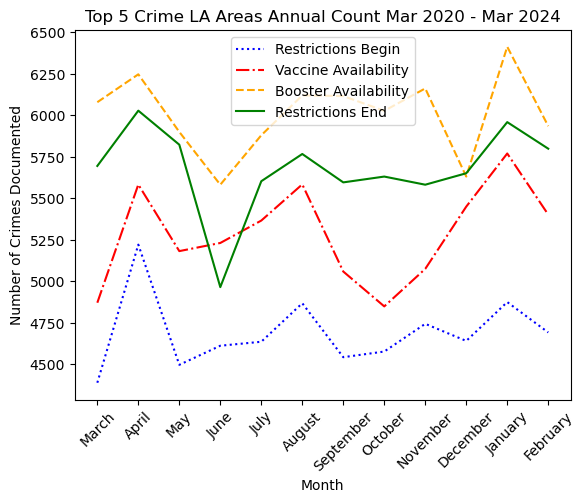

In [114]:
xt1= ["March", "April", "May", "June", "July", "August", "September", "October", "November", "December", "January", "February"]
yt1=t2021["Total Counts"]
yt2=t2122["Total Counts"]
yt3=t2223["Total Counts"]
yt4=t2324["Total Counts"]

plt.plot(xt1,yt1, color='blue', linestyle='dotted', label="Restrictions Begin")
plt.plot(xt1,yt2, color='red', linestyle='dashdot', label="Vaccine Availability")
plt.plot(xt1,yt3, color='orange', linestyle='dashed', label="Booster Availability")
plt.plot(xt1,yt4, color='green', linestyle='solid', label="Restrictions End")
plt.xticks(rotation=45)
plt.xlabel("Month")
plt.ylabel("Number of Crimes Documented")

plt.legend(loc='best')
plt.tight_layout

plt.title("Top 5 Crime LA Areas Annual Count Mar 2020 - Mar 2024")
#plt.savefig("top5_Total_Vs_Year.pdf", bbox_inches="tight")
plt.show()

In [38]:
combodata.head()

,date_occ,area_name,crm_cd,crm_cd_2,crm_cd_3,crm_cd_4,vict_age,vict_sex,vict_descent,premis_desc,lat,lon,weapons_used_cd,Year
0,2020-03-01,Wilshire,510.0,998.0,NaN,NaN,0.0,M,O,STREET,34.0375,-118.3506,NaN,Q1
2,2020-11-04,Southwest,480.0,NaN,NaN,NaN,19.0,X,X,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",34.0210,-118.3002,NaN,Q1
3,2020-03-10,Van Nuys,343.0,NaN,NaN,NaN,19.0,M,O,CLOTHING STORE,34.1576,-118.4387,NaN,Q1
4,2020-08-17,Hollywood,354.0,NaN,NaN,NaN,28.0,M,H,SIDEWALK,34.0944,-118.3277,NaN,Q1
5,2020-12-01,Southeast,354.0,NaN,NaN,NaN,41.0,M,H,SINGLE FAMILY DWELLING,33.9467,-118.2463,NaN,Q1


In [39]:
yearsum = combodata.groupby(["Year"])["date_occ"].count().reset_index(name="Total Counts")
yearsum


,Year,Total Counts
0,Q1,194853
1,Q2,212633
2,Q3,236963
3,Q4,228420


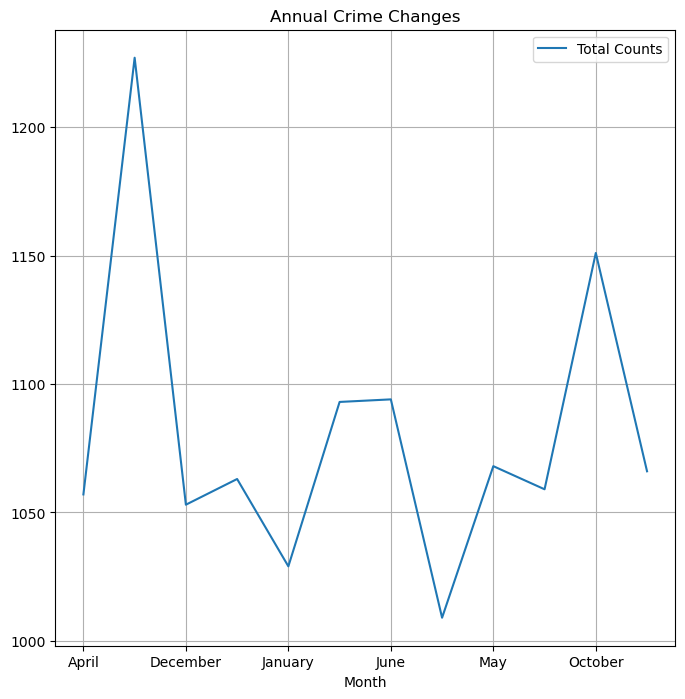

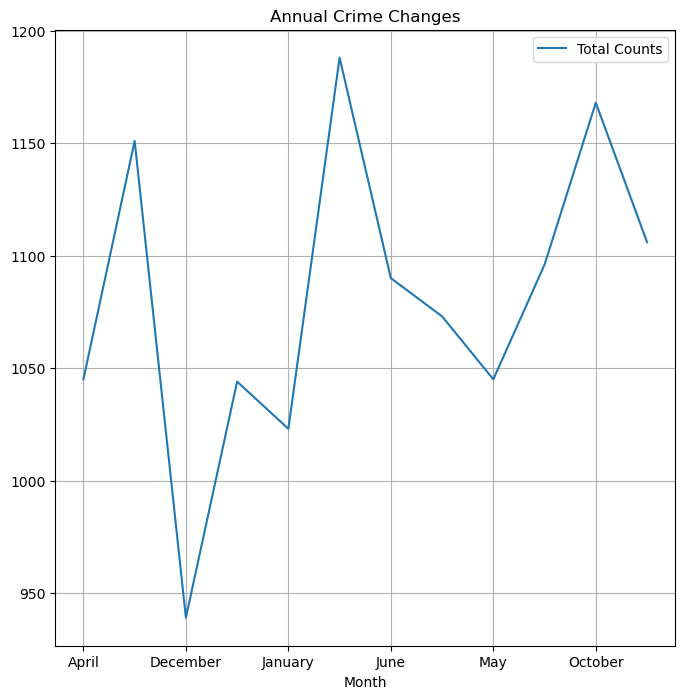

In [183]:
annual2021.plot(kind="line", x="Month", y="Total Counts", grid=True, figsize=(8,8),
            title="Annual Crime Changes")

annual2022.plot(kind="line", x="Month", y="Total Counts", grid=True, figsize=(8,8),
            title="Annual Crime Changes")

plt.show()

In [ ]:
x_axis = np.arange(len(YearArCount))
tick_locations = [value+0.4 for value in x_axis]

In [84]:
x_axis = np.arange(len(YearArCount))
tick_locations = [value+0.4 for value in x_axis]

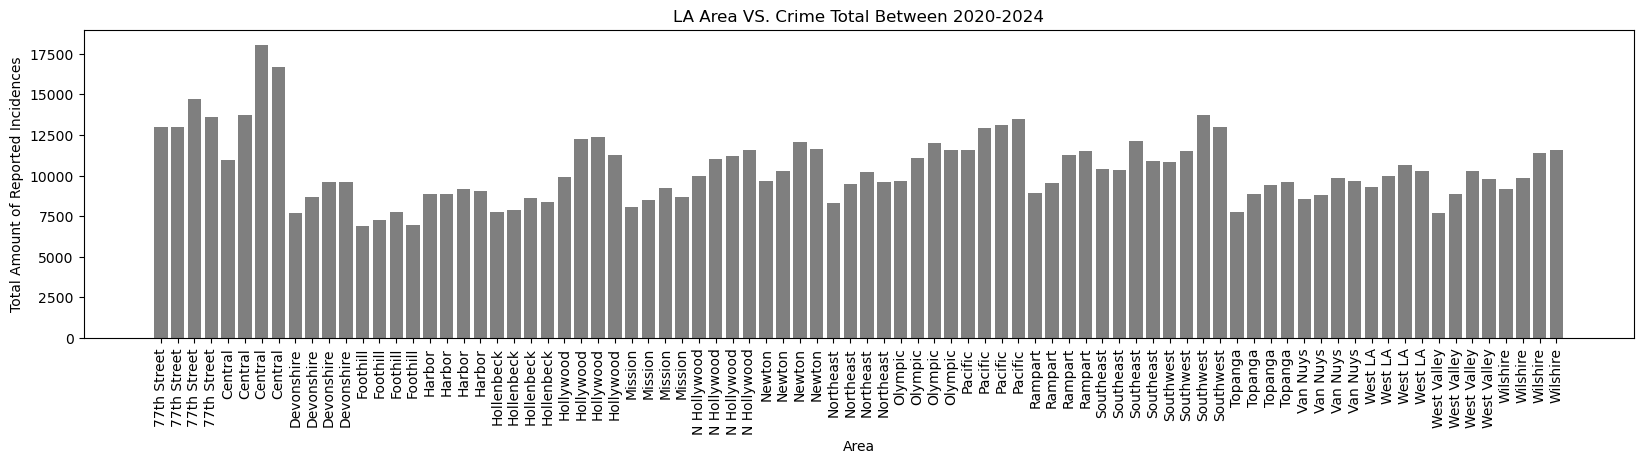

In [85]:
plt.figure(figsize=(20,4))
plt.bar(x_axis, YearArCount["Total Numbers"], color='k', alpha=0.5, align="edge")
plt.xticks(tick_locations, YearArCount["area_name"], rotation="vertical")

plt.title("LA Area VS. Crime Total Between 2020-2024")
plt.xlabel("Area")
plt.ylabel("Total Amount of Reported Incidences")

plt.show()

In [86]:
ArCount = combodata.groupby(["area_name"])["area_name"].count().reset_index(name="Total Numbers")
ArCount

,area_name,Total Numbers
0,77th Street,54301
1,Central,59529
2,Devonshire,35595
3,Foothill,28807
4,Harbor,35955
5,Hollenbeck,32592
6,Hollywood,45814
7,Mission,34488
8,N Hollywood,43766
9,Newton,43626


In [123]:
topcrime = ArCount.sort_values(['Total Numbers'], ascending=False)
topcrime.head(5)

,area_name,Total Numbers
1,Central,59529
0,77th Street,54301
12,Pacific,51164
15,Southwest,49052
6,Hollywood,45814


In [124]:
lowcrime = ArCount.sort_values(['Total Numbers'], ascending=True)
lowcrime.head(5)

,area_name,Total Numbers
3,Foothill,28807
5,Hollenbeck,32592
7,Mission,34488
16,Topanga,35592
2,Devonshire,35595


In [87]:
x_axis = np.arange(len(ArCount))
tick_locations = [value+0.4 for value in x_axis]

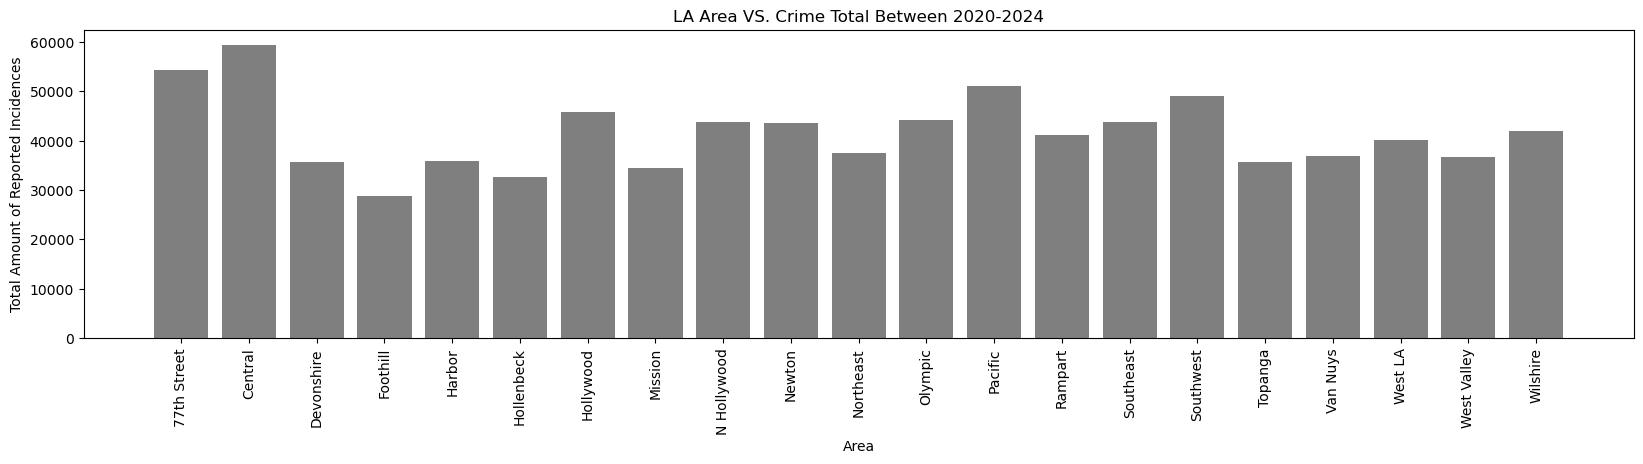

In [88]:
plt.figure(figsize=(20,4))
plt.bar(x_axis, ArCount["Total Numbers"], color='k', alpha=0.5, align="edge")
plt.xticks(tick_locations, ArCount["area_name"], rotation="vertical")

plt.title("LA Area VS. Crime Total Between 2020-2024")
plt.xlabel("Area")
plt.ylabel("Total Amount of Reported Incidences")

plt.show()